In [1]:
import sys

sys.path.append("../../ares_transverse_tuning")

In [2]:
from collections import Counter
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scienceplots
import seaborn as sns
from icecream import ic
from llm_stats import (
    elo_ratings,
    hellaswag_scores,
    mmlu_scores,
    mt_bench_scores,
    num_parameters,
)
from src.eval import Study

In [3]:
plt.style.use(["science", "ieee"])

In [4]:
# plt.rcParams

In [5]:
FIG_DIR = Path("./")
DATA_DIR = Path("../../data/paper")

In [6]:
def replace_names_with_paper_names(ratings_dict: dict) -> None:
    ratings_dict["GPT 4 Turbo"] = ratings_dict["GPT 4 Turbo Preview"]
    del ratings_dict["GPT 4 Turbo Preview"]
    ratings_dict["Mistral 7B"] = ratings_dict["Mistral 7B v0.2"]
    del ratings_dict["Mistral 7B v0.2"]
    ratings_dict["Starling LM 7B"] = ratings_dict["Starling LM 7B Beta"]
    del ratings_dict["Starling LM 7B Beta"]


replace_names_with_paper_names(elo_ratings)
replace_names_with_paper_names(hellaswag_scores)
replace_names_with_paper_names(mmlu_scores)
replace_names_with_paper_names(mt_bench_scores)
replace_names_with_paper_names(num_parameters)

In [7]:
rl_study = Study.load(
    DATA_DIR / "baselines" / "rl",
    runs="trial-*_*",
    name="Reinforcement learning",
    use_problem_index=True,
).head(50)
bo_hard_study = Study.load(
    DATA_DIR / "baselines" / "bo_hard",
    runs="trial-*_*",
    name="Bayesian optimisation",
    use_problem_index=True,
).head(50)
es_study = Study.load(
    DATA_DIR / "baselines" / "es",
    runs="trial-*_*",
    name="Extremum seeking",
    use_problem_index=True,
).head(50)
random_study = Study.load(
    DATA_DIR / "baselines" / "rs",
    runs="trial-*_*",
    name="Random search",
    use_problem_index=True,
).head(50)
do_nothing_study = Study.load(
    DATA_DIR / "baselines" / "dn",
    runs="trial-*_*",
    name="Do nothing",
    use_problem_index=True,
).head(50)

In [8]:
baseline_studies = [rl_study, bo_hard_study, es_study, random_study, do_nothing_study]

In [9]:
# Remove " - head" suffixes introduced when taking the studies' heads
for study in baseline_studies:
    study.name = study.name.replace(" - head", "")

In [10]:
gemma_2b_tuning_study = Study.load(
    DATA_DIR / "tuning" / "gemma-2b",
    runs="trial-*_*/recorded_episodes",
    name="Gemma 2B",
    use_problem_index=True,
)
gpt_4_turbo_tuning_study = Study.load(
    DATA_DIR / "tuning" / "gpt-4-0125-preview",  # Turbo Preview
    runs="trial-*_*/recorded_episodes",
    name="GPT 4 Turbo",
    use_problem_index=True,
)
mixtral_8x7b_tuning_study = Study.load(
    DATA_DIR / "tuning" / "mixtral-8x7b",
    runs="trial-*_*/recorded_episodes",
    name="Mixtral 8x7B",
    use_problem_index=True,
)

In [11]:
tuning_llm_studies = [
    gemma_2b_tuning_study,
    gpt_4_turbo_tuning_study,
    mixtral_8x7b_tuning_study,
]

In [12]:
gemma_2b_explained_study = Study.load(
    DATA_DIR / "explained" / "gemma-2b",
    runs="trial-*_*/recorded_episodes",
    name="Gemma 2B",
    use_problem_index=True,
)
gemma_7b_explained_study = Study.load(
    DATA_DIR / "explained" / "gemma-7b",
    runs="trial-*_*/recorded_episodes",
    name="Gemma 7B",
    use_problem_index=True,
)
gpt_35_turbo_explained_study = Study.load(
    DATA_DIR / "explained" / "gpt-3.5-turbo-0125",
    runs="trial-*_*/recorded_episodes",
    name="GPT 3.5 Turbo",
    use_problem_index=True,
)
gpt_4_explained_study = Study.load(
    DATA_DIR / "explained" / "gpt-4",
    runs="trial-*_*/recorded_episodes",
    name="GPT 4",
    use_problem_index=True,
)
gpt_4_turbo_explained_study = Study.load(
    DATA_DIR / "explained" / "gpt-4-turbo-preview",
    runs="trial-*_*/recorded_episodes",
    name="GPT 4 Turbo",
    use_problem_index=True,
)
llama2_7b_explained_study = Study.load(
    DATA_DIR / "explained" / "llama2-7b",
    runs="trial-*_*/recorded_episodes",
    name="Llama 2 7B",
    use_problem_index=True,
)
llama2_13b_explained_study = Study.load(
    DATA_DIR / "explained" / "llama2-13b",
    runs="trial-*_*/recorded_episodes",
    name="Llama 2 13B",
    use_problem_index=True,
)
llama2_70b_explained_study = Study.load(
    DATA_DIR / "explained" / "llama2-70b",
    runs="trial-*_*/recorded_episodes",
    name="Llama 2 70B",
    use_problem_index=True,
)
mistral_7b_v02_explained_study = Study.load(
    DATA_DIR / "explained" / "mistral-v0.2",
    runs="trial-*_*/recorded_episodes",
    name="Mistral 7B",
    use_problem_index=True,
)
mixtral_8x7b_explained_study = Study.load(
    DATA_DIR / "explained" / "mixtral-8x7b",
    runs="trial-*_*/recorded_episodes",
    name="Mixtral 8x7B",
    use_problem_index=True,
)
orca2_7b_explained_study = Study.load(
    DATA_DIR / "explained" / "orca2-7b",
    runs="trial-*_*/recorded_episodes",
    name="Orca 2 7B",
    use_problem_index=True,
)
orca2_13b_explained_study = Study.load(
    DATA_DIR / "explained" / "orca2-13b",
    runs="trial-*_*/recorded_episodes",
    name="Orca 2 13B",
    use_problem_index=True,
)
starling_lm_7b_beta_explained_study = Study.load(
    DATA_DIR / "explained" / "starling-lm-7b-beta",
    runs="trial-*_*/recorded_episodes",
    name="Starling LM 7B",
    use_problem_index=True,
)
vicuna_7b_16k_explained_study = Study.load(
    DATA_DIR / "explained" / "vicuna-7b-16k",
    runs="trial-*_*/recorded_episodes",
    name="Vicuna 7B 16K",
    use_problem_index=True,
)

In [13]:
explained_llm_studies = [
    gemma_2b_explained_study,
    gemma_7b_explained_study,
    gpt_35_turbo_explained_study,
    gpt_4_explained_study,
    gpt_4_turbo_explained_study,
    llama2_7b_explained_study,
    llama2_13b_explained_study,
    llama2_70b_explained_study,
    mistral_7b_v02_explained_study,
    mixtral_8x7b_explained_study,
    orca2_7b_explained_study,
    orca2_13b_explained_study,
    starling_lm_7b_beta_explained_study,
    vicuna_7b_16k_explained_study,
]

In [14]:
gemma_2b_cot_study = Study.load(
    DATA_DIR / "cot" / "gemma-2b",
    runs="trial-*_*/recorded_episodes",
    name="Gemma 2B",
    use_problem_index=True,
)
gpt_4_turbo_cot_study = Study.load(
    DATA_DIR / "cot" / "gpt-4-0125-preview",  # Turbo Preview
    runs="trial-*_*/recorded_episodes",
    name="GPT 4 Turbo",
    use_problem_index=True,
)
mixtral_8x7b_cot_study = Study.load(
    DATA_DIR / "cot" / "mixtral-8x7b",
    runs="trial-*_*/recorded_episodes",
    name="Mixtral 8x7B",
    use_problem_index=True,
)

In [15]:
cot_llm_studies = [gemma_2b_cot_study, gpt_4_turbo_cot_study, mixtral_8x7b_cot_study]

In [16]:
gemma_2b_optimization_study = Study.load(
    DATA_DIR / "optimisation" / "gemma-2b",
    runs="trial-*_*/recorded_episodes",
    name="Gemma 2B",
    use_problem_index=True,
)
gemma_7b_optimization_study = Study.load(
    DATA_DIR / "optimisation" / "gemma-7b",
    runs="trial-*_*/recorded_episodes",
    name="Gemma 7B",
    use_problem_index=True,
)
gpt_35_turbo_optimization_study = Study.load(
    DATA_DIR / "optimisation" / "gpt-3.5-turbo-0125",
    runs="trial-*_*/recorded_episodes",
    name="GPT 3.5 Turbo",
    use_problem_index=True,
)
gpt_4_optimization_study = Study.load(
    DATA_DIR / "optimisation" / "gpt-4",
    runs="trial-*_*/recorded_episodes",
    name="GPT 4",
    use_problem_index=True,
)
gpt_4_turbo_optimization_study = Study.load(
    DATA_DIR / "optimisation" / "gpt-4-0125-preview",  # Turbo Preview
    runs="trial-*_*/recorded_episodes",
    name="GPT 4 Turbo",
    use_problem_index=True,
)
llama2_7b_optimization_study = Study.load(
    DATA_DIR / "optimisation" / "llama2-7b",
    runs="trial-*_*/recorded_episodes",
    name="Llama 2 7B",
    use_problem_index=True,
)
llama2_13b_optimization_study = Study.load(
    DATA_DIR / "optimisation" / "llama2-13b",
    runs="trial-*_*/recorded_episodes",
    name="Llama 2 13B",
    use_problem_index=True,
)
llama2_70b_optimization_study = Study.load(
    DATA_DIR / "optimisation" / "llama2-70b",
    runs="trial-*_*/recorded_episodes",
    name="Llama 2 70B",
    use_problem_index=True,
)
mistral_7b_v02_optimization_study = Study.load(
    DATA_DIR / "optimisation" / "mistral-v0.2",
    runs="trial-*_*/recorded_episodes",
    name="Mistral 7B",
    use_problem_index=True,
)
mixtral_8x7b_optimization_study = Study.load(
    DATA_DIR / "optimisation" / "mixtral-8x7b",
    runs="trial-*_*/recorded_episodes",
    name="Mixtral 8x7B",
    use_problem_index=True,
)
orca2_7b_optimization_study = Study.load(
    DATA_DIR / "optimisation" / "orca2-7b",
    runs="trial-*_*/recorded_episodes",
    name="Orca 2 7B",
    use_problem_index=True,
)
orca2_13b_optimization_study = Study.load(
    DATA_DIR / "optimisation" / "orca2-13b",
    runs="trial-*_*/recorded_episodes",
    name="Orca 2 13B",
    use_problem_index=True,
)
starling_lm_7b_beta_optimization_study = Study.load(
    DATA_DIR / "optimisation" / "starling-lm-7b-beta",
    runs="trial-*_*/recorded_episodes",
    name="Starling LM 7B",
    use_problem_index=True,
)
vicuna_7b_16k_optimization_study = Study.load(
    DATA_DIR / "optimisation" / "vicuna-7b-16k",
    runs="trial-*_*/recorded_episodes",
    name="Vicuna 7B 16K",
    use_problem_index=True,
)

In [17]:
optimization_llm_studies = [
    gemma_2b_optimization_study,
    gemma_7b_optimization_study,
    gpt_35_turbo_optimization_study,
    gpt_4_optimization_study,
    gpt_4_turbo_optimization_study,
    llama2_7b_optimization_study,
    llama2_13b_optimization_study,
    llama2_70b_optimization_study,
    mistral_7b_v02_optimization_study,
    mixtral_8x7b_optimization_study,
    orca2_7b_optimization_study,
    orca2_13b_optimization_study,
    starling_lm_7b_beta_optimization_study,
    vicuna_7b_16k_optimization_study,
]

In [18]:
all_studies = (
    baseline_studies
    + tuning_llm_studies
    + explained_llm_studies
    + cot_llm_studies
    + optimization_llm_studies
)

## Make the table


In [19]:
# Create the DataFrame
multi_columns = pd.MultiIndex(
    levels=[
        [
            "Final MAE",
            "Normalised MAE improvement",
            "Normalised accumulated MAE",
            "Number of steps",
        ],
        ["Tuning", "Explained", "CoT", "Optimsation", "None"],
        ["Mean", "Std"],
    ],
    codes=[[], [], []],
    names=["Metric", "Prompt", "Statistic"],
)

# Create the DataFrame
df = pd.DataFrame(columns=multi_columns)

In [20]:
# Final MAE
for study in baseline_studies:
    df.loc[study.name, ("Final MAE", "None", "Mean")] = study.mean_final_mae()
    df.loc[study.name, ("Final MAE", "None", "Std")] = study.std_final_mae()

for study in tuning_llm_studies:
    df.loc[study.name, ("Final MAE", "Tuning", "Mean")] = study.mean_final_mae()
    df.loc[study.name, ("Final MAE", "Tuning", "Std")] = study.std_final_mae()

for study in explained_llm_studies:
    df.loc[study.name, ("Final MAE", "Explained", "Mean")] = study.mean_final_mae()
    df.loc[study.name, ("Final MAE", "Explained", "Std")] = study.std_final_mae()

for study in cot_llm_studies:
    df.loc[study.name, ("Final MAE", "CoT", "Mean")] = study.mean_final_mae()
    df.loc[study.name, ("Final MAE", "CoT", "Std")] = study.std_final_mae()

for study in optimization_llm_studies:
    df.loc[study.name, ("Final MAE", "Optimsation", "Mean")] = study.mean_final_mae()
    df.loc[study.name, ("Final MAE", "Optimsation", "Std")] = study.std_final_mae()

In [21]:
# Normalised MAE improvement
for study in baseline_studies:
    collected_normalised_mae_improvements = []
    for episode in study.episodes:
        do_nothing_episode = do_nothing_study.get_episodes_by_problem(
            episode.problem_index
        )[0]
        collected_normalised_mae_improvements.append(
            (episode.final_mae() - do_nothing_episode.maes()[0])
            / do_nothing_episode.maes()[0]
        )

    df.loc[study.name, ("Normalised MAE improvement", "None", "Mean")] = np.mean(
        collected_normalised_mae_improvements
    )
    df.loc[study.name, ("Normalised MAE improvement", "None", "Std")] = np.std(
        collected_normalised_mae_improvements
    )

for study in tuning_llm_studies:
    collected_normalised_mae_improvements = []
    for episode in study.episodes:
        do_nothing_episode = do_nothing_study.get_episodes_by_problem(
            episode.problem_index
        )[0]
        collected_normalised_mae_improvements.append(
            (episode.final_mae() - do_nothing_episode.maes()[0])
            / do_nothing_episode.maes()[0]
        )

    df.loc[study.name, ("Normalised MAE improvement", "Tuning", "Mean")] = np.mean(
        collected_normalised_mae_improvements
    )
    df.loc[study.name, ("Normalised MAE improvement", "Tuning", "Std")] = np.std(
        collected_normalised_mae_improvements
    )

for study in explained_llm_studies:
    collected_normalised_mae_improvements = []
    for episode in study.episodes:
        do_nothing_episode = do_nothing_study.get_episodes_by_problem(
            episode.problem_index
        )[0]
        collected_normalised_mae_improvements.append(
            (episode.final_mae() - do_nothing_episode.maes()[0])
            / do_nothing_episode.maes()[0]
        )

    df.loc[study.name, ("Normalised MAE improvement", "Explained", "Mean")] = np.mean(
        collected_normalised_mae_improvements
    )
    df.loc[study.name, ("Normalised MAE improvement", "Explained", "Std")] = np.std(
        collected_normalised_mae_improvements
    )

for study in cot_llm_studies:
    collected_normalised_mae_improvements = []
    for episode in study.episodes:
        do_nothing_episode = do_nothing_study.get_episodes_by_problem(
            episode.problem_index
        )[0]
        collected_normalised_mae_improvements.append(
            (episode.final_mae() - do_nothing_episode.maes()[0])
            / do_nothing_episode.maes()[0]
        )

    df.loc[study.name, ("Normalised MAE improvement", "CoT", "Mean")] = np.mean(
        collected_normalised_mae_improvements
    )
    df.loc[study.name, ("Normalised MAE improvement", "CoT", "Std")] = np.std(
        collected_normalised_mae_improvements
    )

for study in optimization_llm_studies:
    collected_normalised_mae_improvements = []
    for episode in study.episodes:
        do_nothing_episode = do_nothing_study.get_episodes_by_problem(
            episode.problem_index
        )[0]
        collected_normalised_mae_improvements.append(
            (episode.final_mae() - do_nothing_episode.maes()[0])
            / do_nothing_episode.maes()[0]
        )

    df.loc[study.name, ("Normalised MAE improvement", "Optimsation", "Mean")] = np.mean(
        collected_normalised_mae_improvements
    )
    df.loc[study.name, ("Normalised MAE improvement", "Optimsation", "Std")] = np.std(
        collected_normalised_mae_improvements
    )

In [22]:
# Normalised accumulated MAE
for study in baseline_studies:
    collected_normalised_accumulated_maes = []
    for episode in study.episodes:
        do_nothing_episode = do_nothing_study.get_episodes_by_problem(
            episode.problem_index
        )[0]
        collected_normalised_accumulated_maes.append(
            episode.accumulated_mae() / do_nothing_episode.accumulated_mae()
        )

    df.loc[study.name, ("Normalised accumulated MAE", "None", "Mean")] = np.mean(
        collected_normalised_accumulated_maes
    )
    df.loc[study.name, ("Normalised accumulated MAE", "None", "Std")] = np.std(
        collected_normalised_accumulated_maes
    )

for study in tuning_llm_studies:
    collected_normalised_accumulated_maes = []
    for episode in study.episodes:
        do_nothing_episode = do_nothing_study.get_episodes_by_problem(
            episode.problem_index
        )[0]
        collected_normalised_accumulated_maes.append(
            episode.accumulated_mae() / do_nothing_episode.accumulated_mae()
        )

    df.loc[study.name, ("Normalised accumulated MAE", "Tuning", "Mean")] = np.mean(
        collected_normalised_accumulated_maes
    )
    df.loc[study.name, ("Normalised accumulated MAE", "Tuning", "Std")] = np.std(
        collected_normalised_accumulated_maes
    )

for study in explained_llm_studies:
    collected_normalised_accumulated_maes = []
    for episode in study.episodes:
        do_nothing_episode = do_nothing_study.get_episodes_by_problem(
            episode.problem_index
        )[0]
        collected_normalised_accumulated_maes.append(
            episode.accumulated_mae() / do_nothing_episode.accumulated_mae()
        )

    df.loc[study.name, ("Normalised accumulated MAE", "Explained", "Mean")] = np.mean(
        collected_normalised_accumulated_maes
    )
    df.loc[study.name, ("Normalised accumulated MAE", "Explained", "Std")] = np.std(
        collected_normalised_accumulated_maes
    )

for study in cot_llm_studies:
    collected_normalised_accumulated_maes = []
    for episode in study.episodes:
        do_nothing_episode = do_nothing_study.get_episodes_by_problem(
            episode.problem_index
        )[0]
        collected_normalised_accumulated_maes.append(
            episode.accumulated_mae() / do_nothing_episode.accumulated_mae()
        )

    df.loc[study.name, ("Normalised accumulated MAE", "CoT", "Mean")] = np.mean(
        collected_normalised_accumulated_maes
    )
    df.loc[study.name, ("Normalised accumulated MAE", "CoT", "Std")] = np.std(
        collected_normalised_accumulated_maes
    )

for study in optimization_llm_studies:
    collected_normalised_accumulated_maes = []
    for episode in study.episodes:
        do_nothing_episode = do_nothing_study.get_episodes_by_problem(
            episode.problem_index
        )[0]
        collected_normalised_accumulated_maes.append(
            episode.accumulated_mae() / do_nothing_episode.accumulated_mae()
        )

    df.loc[study.name, ("Normalised accumulated MAE", "Optimsation", "Mean")] = np.mean(
        collected_normalised_accumulated_maes
    )
    df.loc[study.name, ("Normalised accumulated MAE", "Optimsation", "Std")] = np.std(
        collected_normalised_accumulated_maes
    )

In [23]:
# Number of steps
for study in tuning_llm_studies:
    collected_steps = []
    for episode in study.episodes:
        collected_steps.append(len(episode) - 1)  # -1 to not count reset

    df.loc[study.name, ("Number of steps", "Tuning", "Mean")] = np.mean(collected_steps)
    df.loc[study.name, ("Number of steps", "Tuning", "Std")] = np.std(collected_steps)

for study in explained_llm_studies:
    collected_steps = []
    for episode in study.episodes:
        collected_steps.append(len(episode) - 1)  # -1 to not count reset

    df.loc[study.name, ("Number of steps", "Explained", "Mean")] = np.mean(
        collected_steps
    )
    df.loc[study.name, ("Number of steps", "Explained", "Std")] = np.std(
        collected_steps
    )

for study in cot_llm_studies:
    collected_steps = []
    for episode in study.episodes:
        collected_steps.append(len(episode) - 1)  # -1 to not count reset

    df.loc[study.name, ("Number of steps", "CoT", "Mean")] = np.mean(collected_steps)
    df.loc[study.name, ("Number of steps", "CoT", "Std")] = np.std(collected_steps)

for study in optimization_llm_studies:
    collected_steps = []
    for episode in study.episodes:
        collected_steps.append(len(episode) - 1)  # -1 to not count reset

    df.loc[study.name, ("Number of steps", "Optimsation", "Mean")] = np.mean(
        collected_steps
    )
    df.loc[study.name, ("Number of steps", "Optimsation", "Std")] = np.std(
        collected_steps
    )

In [24]:
df

Metric                 Final MAE                                          \
Prompt                      None              Tuning           Explained   
Statistic                   Mean       Std      Mean       Std      Mean   
Reinforcement learning  0.000016  0.000017       NaN       NaN       NaN   
Bayesian optimisation   0.000100  0.000026       NaN       NaN       NaN   
Extremum seeking        0.000457  0.000267       NaN       NaN       NaN   
Random search           0.007677  0.003830       NaN       NaN       NaN   
Do nothing              0.001967  0.000903       NaN       NaN       NaN   
Gemma 2B                     NaN       NaN  0.001452  0.000525  0.001665   
GPT 4 Turbo                  NaN       NaN  0.002647  0.001827  0.002184   
Mixtral 8x7B                 NaN       NaN  0.001321  0.000771  0.001606   
Gemma 7B                     NaN       NaN       NaN       NaN  0.001651   
GPT 3.5 Turbo                NaN       NaN       NaN       NaN  0.011593   
GPT 4                        NaN       NaN       NaN       NaN  0.001849   
Llama 2 7B                   NaN       NaN       NaN       NaN  0.001432   
Llama 2 13B                  NaN       NaN       NaN       NaN  0.001936   
Llama 2 70B                  NaN       NaN       NaN       NaN  0.001947   
Mistral 7B                   NaN       NaN       NaN       NaN  0.002551   
Orca 2 7B                    NaN       NaN       NaN       NaN  0.002149   
Orca 2 13B                   NaN       NaN       NaN       NaN  0.001634   
Starling LM 7B               NaN       NaN       NaN       NaN  0.001401   
Vicuna 7B 16K                NaN       NaN       NaN       NaN  0.004756   

Metric                                                                      \
Prompt                                 CoT           Optimsation             
Statistic                    Std      Mean       Std        Mean       Std   
Reinforcement learning       NaN       NaN       NaN         NaN       NaN   
Bayesian optimisation        NaN       NaN       NaN         NaN       NaN   
Extremum seeking             NaN       NaN       NaN         NaN       NaN   
Random search                NaN       NaN       NaN         NaN       NaN   
Do nothing                   NaN       NaN       NaN         NaN       NaN   
Gemma 2B                0.000634  0.000955  0.000702    0.003180  0.005187   
GPT 4 Turbo             0.001879  0.001337  0.000813    0.000962  0.000740   
Mixtral 8x7B            0.001158  0.001775  0.000926    0.001901  0.001192   
Gemma 7B                0.000764       NaN       NaN    0.008105  0.012933   
GPT 3.5 Turbo           0.014850       NaN       NaN    0.001197  0.000771   
GPT 4                   0.001445       NaN       NaN    0.001213  0.000860   
Llama 2 7B              0.000798       NaN       NaN    0.002085  0.000779   
Llama 2 13B             0.000772       NaN       NaN    0.001507  0.000821   
Llama 2 70B             0.000964       NaN       NaN    0.001539  0.000942   
Mistral 7B              0.001233       NaN       NaN    0.019653  0.023427   
Orca 2 7B               0.001222       NaN       NaN    0.001377  0.000855   
Orca 2 13B              0.000875       NaN       NaN    0.003232  0.003684   
Starling LM 7B          0.000449       NaN       NaN    0.007659  0.007249   
Vicuna 7B 16K           0.005332       NaN       NaN    0.004331  0.003829   

Metric                  ... Normalised accumulated MAE             \
Prompt                  ...                Optimsation              
Statistic               ...                       Mean        Std   
Reinforcement learning  ...                        NaN        NaN   
Bayesian optimisation   ...                        NaN        NaN   
Extremum seeking        ...                        NaN        NaN   
Random search           ...                        NaN        NaN   
Do nothing              ...                        NaN        NaN   
Gemma 2B                ...                   1.366193   0

In [25]:
df.loc[:, ("Final MAE (mum)", "None", "Mean")] = (
    df.loc[:, ("Final MAE", "None", "Mean")] * 1e6
).round()
df.loc[:, ("Final MAE (mum)", "None", "Std")] = (
    df.loc[:, ("Final MAE", "None", "Std")] * 1e6
).round()
df.loc[:, ("Final MAE (mum)", "Tuning", "Mean")] = (
    df.loc[:, ("Final MAE", "Tuning", "Mean")] * 1e6
).round()
df.loc[:, ("Final MAE (mum)", "Tuning", "Std")] = (
    df.loc[:, ("Final MAE", "Tuning", "Std")] * 1e6
).round()
df.loc[:, ("Final MAE (mum)", "Explained", "Mean")] = (
    df.loc[:, ("Final MAE", "Explained", "Mean")] * 1e6
).round()
df.loc[:, ("Final MAE (mum)", "Explained", "Std")] = (
    df.loc[:, ("Final MAE", "Explained", "Std")] * 1e6
).round()
df.loc[:, ("Final MAE (mum)", "CoT", "Mean")] = (
    df.loc[:, ("Final MAE", "CoT", "Mean")] * 1e6
).round()
df.loc[:, ("Final MAE (mum)", "CoT", "Std")] = (
    df.loc[:, ("Final MAE", "CoT", "Std")] * 1e6
).round()
df.loc[:, ("Final MAE (mum)", "Optimsation", "Mean")] = (
    df.loc[:, ("Final MAE", "Optimsation", "Mean")] * 1e6
).round()
df.loc[:, ("Final MAE (mum)", "Optimsation", "Std")] = (
    df.loc[:, ("Final MAE", "Optimsation", "Std")] * 1e6
).round()

df = df.drop(columns=["Final MAE"])

df.loc[:, ("Normalised MAE improvement (%)", "None", "Mean")] = (
    df.loc[:, ("Normalised MAE improvement", "None", "Mean")] * 100
).round()
df.loc[:, ("Normalised MAE improvement (%)", "None", "Std")] = (
    df.loc[:, ("Normalised MAE improvement", "None", "Std")] * 100
).round()
df.loc[:, ("Normalised MAE improvement (%)", "Tuning", "Mean")] = (
    df.loc[:, ("Normalised MAE improvement", "Tuning", "Mean")] * 100
).round()
df.loc[:, ("Normalised MAE improvement (%)", "Tuning", "Std")] = (
    df.loc[:, ("Normalised MAE improvement", "Tuning", "Std")] * 100
).round()
df.loc[:, ("Normalised MAE improvement (%)", "Explained", "Mean")] = (
    df.loc[:, ("Normalised MAE improvement", "Explained", "Mean")] * 100
).round()
df.loc[:, ("Normalised MAE improvement (%)", "Explained", "Std")] = (
    df.loc[:, ("Normalised MAE improvement", "Explained", "Std")] * 100
).round()
df.loc[:, ("Normalised MAE improvement (%)", "CoT", "Mean")] = (
    df.loc[:, ("Normalised MAE improvement", "CoT", "Mean")] * 100
).round()
df.loc[:, ("Normalised MAE improvement (%)", "CoT", "Std")] = (
    df.loc[:, ("Normalised MAE improvement", "CoT", "Std")] * 100
).round()
df.loc[:, ("Normalised MAE improvement (%)", "Optimsation", "Mean")] = (
    df.loc[:, ("Normalised MAE improvement", "Optimsation", "Mean")] * 100
).round()
df.loc[:, ("Normalised MAE improvement (%)", "Optimsation", "Std")] = (
    df.loc[:, ("Normalised MAE improvement", "Optimsation", "Std")] * 100
).round()

df = df.drop(columns=["Normalised MAE improvement"])

df.loc[:, ("Normalised accumulated MAE (%)", "None", "Mean")] = (
    df.loc[:, ("Normalised accumulated MAE", "None", "Mean")] * 100
).round()
df.loc[:, ("Normalised accumulated MAE (%)", "None", "Std")] = (
    df.loc[:, ("Normalised accumulated MAE", "None", "Std")] * 100
).round()
df.loc[:, ("Normalised accumulated MAE (%)", "Tuning", "Mean")] = (
    df.loc[:, ("Normalised accumulated MAE", "Tuning", "Mean")] * 100
).round()
df.loc[:, ("Normalised accumulated MAE (%)", "Tuning", "Std")] = (
    df.loc[:, ("Normalised accumulated MAE", "Tuning", "Std")] * 100
).round()
df.loc[:, ("Normalised accumulated MAE (%)", "Explained", "Mean")] = (
    df.loc[:, ("Normalised accumulated MAE", "Explained", "Mean")] * 100
).round()
df.loc[:, ("Normalised accumulated MAE (%)", "Explained", "Std")] = (
    df.loc[:, ("Normalised accumulated MAE", "Explained", "Std")] * 100
).round()
df.loc[:, ("Normalised accumulated MAE (%)", "CoT", "Mean")] = (
    df.loc[:, ("Normalised accumulated MAE", "CoT", "Mean")] * 100
).round()
df.loc[:, ("Normalised accumulated MAE (%)", "CoT", "Std")] = (
    df.loc[:, ("Normalised accumulated MAE", "CoT", "Std")] * 100
).round()
df.loc[:, ("Normalised accumulated MAE (%)", "Optimsation", "Mean")] = (
    df.loc[:, ("Normalised accumulated MAE", "Optimsation", "Mean")] * 100
).round()
df.loc[:, ("Normalised accumulated MAE (%)", "Optimsation", "Std")] = (
    df.loc[:, ("Normalised accumulated MAE", "Optimsation", "Std")] * 100
).round()

df = df.drop(columns=["Normalised accumulated MAE"])

df.loc[:, ("Number of steps", "Tuning", "Mean")] = (
    df.loc[:, ("Number of steps", "Tuning", "Mean")]
).round()
df.loc[:, ("Number of steps", "Tuning", "Std")] = (
    df.loc[:, ("Number of steps", "Tuning", "Std")]
).round()
df.loc[:, ("Number of steps", "Explained", "Mean")] = (
    df.loc[:, ("Number of steps", "Explained", "Mean")]
).round()
df.loc[:, ("Number of steps", "Explained", "Std")] = (
    df.loc[:, ("Number of steps", "Explained", "Std")]
).round()
df.loc[:, ("Number of steps", "CoT", "Mean")] = (
    df.loc[:, ("Number of steps", "CoT", "Mean")]
).round()
df.loc[:, ("Number of steps", "CoT", "Std")] = (
    df.loc[:, ("Number of steps", "CoT", "Std")]
).round()
df.loc[:, ("Number of steps", "Optimsation", "Mean")] = (
    df.loc[:, ("Number of steps", "Optimsation", "Mean")]
).round()
df.loc[:, ("Number of steps", "Optimsation", "Std")] = (
    df.loc[:, ("Number of steps", "Optimsation", "Std")]
).round()

df

Metric                 Number of steps                                  \
Prompt                          Tuning      Explained         CoT        
Statistic                         Mean  Std      Mean   Std  Mean  Std   
Reinforcement learning             NaN  NaN       NaN   NaN   NaN  NaN   
Bayesian optimisation              NaN  NaN       NaN   NaN   NaN  NaN   
Extremum seeking                   NaN  NaN       NaN   NaN   NaN  NaN   
Random search                      NaN  NaN       NaN   NaN   NaN  NaN   
Do nothing                         NaN  NaN       NaN   NaN   NaN  NaN   
Gemma 2B                          10.0  1.0      23.0  19.0  50.0  0.0   
GPT 4 Turbo                       50.0  0.0      50.0   0.0  50.0  0.0   
Mixtral 8x7B                      50.0  0.0      50.0   0.0  50.0  0.0   
Gemma 7B                           NaN  NaN       9.0   0.0   NaN  NaN   
GPT 3.5 Turbo                      NaN  NaN      50.0   0.0   NaN  NaN   
GPT 4                              NaN  NaN      50.0   0.0   NaN  NaN   
Llama 2 7B                         NaN  NaN       8.0   6.0   NaN  NaN   
Llama 2 13B                        NaN  NaN       0.0   1.0   NaN  NaN   
Llama 2 70B                        NaN  NaN      50.0   0.0   NaN  NaN   
Mistral 7B                         NaN  NaN      50.0   0.0   NaN  NaN   
Orca 2 7B                          NaN  NaN       4.0   3.0   NaN  NaN   
Orca 2 13B                         NaN  NaN       1.0   2.0   NaN  NaN   
Starling LM 7B                     NaN  NaN      36.0  15.0   NaN  NaN   
Vicuna 7B 16K                      NaN  NaN      34.0   7.0   NaN  NaN   

Metric                                   Final MAE (mum)          ...  \
Prompt                 Optimsation                  None          ...   
Statistic                     Mean   Std            Mean     Std  ...   
Reinforcement learning         NaN   NaN            16.0    17.0  ...   
Bayesian optimisation          NaN   NaN           100.0    26.0  ...   
Extremum seeking               NaN   NaN           457.0   267.0  ...   
Random search                  NaN   NaN          7677.0  3830.0  ...   
Do nothing                     NaN   NaN          1967.0   903.0  ...   
Gemma 2B                      39.0  14.0             NaN     NaN  ...   
GPT 4 Turbo                   50.0   0.0             NaN     NaN  ...   
Mixtral 8x7B                  45.0  14.0             NaN     NaN  ...   
Gemma 7B                      29.0  11.0             NaN     NaN  ...   
GPT 3.5 Turbo                 50.0   0.0             NaN     NaN  ...   
GPT 4                         50.0   0.0             NaN     NaN  ...   
Llama 2 7B                     3.0   4.0             NaN     NaN  ...   
Llama 2 13B                   13.0  20.0             NaN     NaN  ...   
Llama 2 70B                   50.0   0.0             NaN     NaN  ...   
Mistral 7B                    30.0  22.0             NaN     NaN  ...   
Orca 2 7B                      4.0   7.0             NaN     NaN  ...   
Orca 2 13B                     3.0   2.0             NaN     NaN  ...   
Starling LM 7B                19.0  16.0             NaN     NaN  ...   
Vicuna 7B 16K                 48.0   7.0             NaN     NaN  ...   

Metric                 Normalised accumulated MAE (%)                      \
Prompt                                           None        Tuning         
Statistic                                        Mean    Std   Mean   Std   
Reinforcement learning                            3.0    1.0    NaN   NaN   
Bayesian optimisation                            31.0   23.0    NaN   NaN   
Extremum seeking                                 35.0   17.0    NaN   NaN   
Random search                                   647.0  476.0    NaN   NaN   
Do nothing                                      100.0    0.0    NaN   NaN   
Gemma 2B                                          NaN    NaN   97.0  43.0   
GPT 4 Turbo                                       NaN    NaN  119.0  64

In [26]:
paper_multi_columns = pd.MultiIndex(
    levels=[
        [
            "Final MAE (mum)",
            "Normalised MAE improvement (%)",
            "Normalised accumulated MAE (%)",
        ],
        ["Tuning", "Explained", "CoT", "Optimsation", "None"],
    ],
    codes=[[], []],
    names=["Metric", "Prompt"],
)
df_paper = pd.DataFrame(columns=paper_multi_columns)

# Combine two columns into a string
df_paper.loc[:, ("Final MAE (mum)", "Tuning")] = (
    df.loc[:, ("Final MAE (mum)", "Tuning", "Mean")].astype(str)
    + " ± "
    + df.loc[:, ("Final MAE (mum)", "Tuning", "Std")].astype(str)
)
df_paper.loc[:, ("Final MAE (mum)", "Explained")] = (
    df.loc[:, ("Final MAE (mum)", "Explained", "Mean")].astype(str)
    + " ± "
    + df.loc[:, ("Final MAE (mum)", "Explained", "Std")].astype(str)
)
df_paper.loc[:, ("Final MAE (mum)", "Optimsation")] = (
    df.loc[:, ("Final MAE (mum)", "Optimsation", "Mean")].astype(str)
    + " ± "
    + df.loc[:, ("Final MAE (mum)", "Optimsation", "Std")].astype(str)
)
df_paper.loc[:, ("Final MAE (mum)", "CoT")] = (
    df.loc[:, ("Final MAE (mum)", "CoT", "Mean")].astype(str)
    + " ± "
    + df.loc[:, ("Final MAE (mum)", "CoT", "Std")].astype(str)
)
df_paper.loc[:, ("Final MAE (mum)", "None")] = (
    df.loc[:, ("Final MAE (mum)", "None", "Mean")].astype(str)
    + " ± "
    + df.loc[:, ("Final MAE (mum)", "None", "Std")].astype(str)
)
df_paper.loc[:, ("Normalised MAE improvement (%)", "Tuning")] = (
    df.loc[:, ("Normalised MAE improvement (%)", "Tuning", "Mean")].astype(str)
    + " ± "
    + df.loc[:, ("Normalised MAE improvement (%)", "Tuning", "Std")].astype(str)
)
df_paper.loc[:, ("Normalised MAE improvement (%)", "Explained")] = (
    df.loc[:, ("Normalised MAE improvement (%)", "Explained", "Mean")].astype(str)
    + " ± "
    + df.loc[:, ("Normalised MAE improvement (%)", "Explained", "Std")].astype(str)
)
df_paper.loc[:, ("Normalised MAE improvement (%)", "CoT")] = (
    df.loc[:, ("Normalised MAE improvement (%)", "CoT", "Mean")].astype(str)
    + " ± "
    + df.loc[:, ("Normalised MAE improvement (%)", "CoT", "Std")].astype(str)
)
df_paper.loc[:, ("Normalised MAE improvement (%)", "Optimsation")] = (
    df.loc[:, ("Normalised MAE improvement (%)", "Optimsation", "Mean")].astype(str)
    + " ± "
    + df.loc[:, ("Normalised MAE improvement (%)", "Optimsation", "Std")].astype(str)
)
df_paper.loc[:, ("Normalised MAE improvement (%)", "None")] = (
    df.loc[:, ("Normalised MAE improvement (%)", "None", "Mean")].astype(str)
    + " ± "
    + df.loc[:, ("Normalised MAE improvement (%)", "None", "Std")].astype(str)
)
df_paper.loc[:, ("Normalised accumulated MAE (%)", "Tuning")] = (
    df.loc[:, ("Normalised accumulated MAE (%)", "Tuning", "Mean")].astype(str)
    + " ± "
    + df.loc[:, ("Normalised accumulated MAE (%)", "Tuning", "Std")].astype(str)
)
df_paper.loc[:, ("Normalised accumulated MAE (%)", "Explained")] = (
    df.loc[:, ("Normalised accumulated MAE (%)", "Explained", "Mean")].astype(str)
    + " ± "
    + df.loc[:, ("Normalised accumulated MAE (%)", "Explained", "Std")].astype(str)
)
df_paper.loc[:, ("Normalised accumulated MAE (%)", "CoT")] = (
    df.loc[:, ("Normalised accumulated MAE (%)", "CoT", "Mean")].astype(str)
    + " ± "
    + df.loc[:, ("Normalised accumulated MAE (%)", "CoT", "Std")].astype(str)
)
df_paper.loc[:, ("Normalised accumulated MAE (%)", "Optimsation")] = (
    df.loc[:, ("Normalised accumulated MAE (%)", "Optimsation", "Mean")].astype(str)
    + " ± "
    + df.loc[:, ("Normalised accumulated MAE (%)", "Optimsation", "Std")].astype(str)
)
df_paper.loc[:, ("Normalised accumulated MAE (%)", "None")] = (
    df.loc[:, ("Normalised accumulated MAE (%)", "None", "Mean")].astype(str)
    + " ± "
    + df.loc[:, ("Normalised accumulated MAE (%)", "None", "Std")].astype(str)
)
df_paper.loc[:, ("Number of steps", "Tuning")] = (
    df.loc[:, ("Number of steps", "Tuning", "Mean")].astype(str)
    + " ± "
    + df.loc[:, ("Number of steps", "Tuning", "Std")].astype(str)
)
df_paper.loc[:, ("Number of steps", "Explained")] = (
    df.loc[:, ("Number of steps", "Explained", "Mean")].astype(str)
    + " ± "
    + df.loc[:, ("Number of steps", "Explained", "Std")].astype(str)
)
df_paper.loc[:, ("Number of steps", "CoT")] = (
    df.loc[:, ("Number of steps", "CoT", "Mean")].astype(str)
    + " ± "
    + df.loc[:, ("Number of steps", "CoT", "Std")].astype(str)
)
df_paper.loc[:, ("Number of steps", "Optimsation")] = (
    df.loc[:, ("Number of steps", "Optimsation", "Mean")].astype(str)
    + " ± "
    + df.loc[:, ("Number of steps", "Optimsation", "Std")].astype(str)
)

df_paper

Metric                  Final MAE (mum)                                        \
Prompt                           Tuning          Explained        Optimsation   
Reinforcement learning        nan ± nan          nan ± nan          nan ± nan   
Bayesian optimisation         nan ± nan          nan ± nan          nan ± nan   
Extremum seeking              nan ± nan          nan ± nan          nan ± nan   
Random search                 nan ± nan          nan ± nan          nan ± nan   
Do nothing                    nan ± nan          nan ± nan          nan ± nan   
Gemma 2B                 1452.0 ± 525.0     1665.0 ± 634.0    3180.0 ± 5187.0   
GPT 4 Turbo             2647.0 ± 1827.0    2184.0 ± 1879.0      962.0 ± 740.0   
Mixtral 8x7B             1321.0 ± 771.0    1606.0 ± 1158.0    1901.0 ± 1192.0   
Gemma 7B                      nan ± nan     1651.0 ± 764.0   8105.0 ± 12933.0   
GPT 3.5 Turbo                 nan ± nan  11593.0 ± 14850.0     1197.0 ± 771.0   
GPT 4                         nan ± nan    1849.0 ± 1445.0     1213.0 ± 860.0   
Llama 2 7B                    nan ± nan     1432.0 ± 798.0     2085.0 ± 779.0   
Llama 2 13B                   nan ± nan     1936.0 ± 772.0     1507.0 ± 821.0   
Llama 2 70B                   nan ± nan     1947.0 ± 964.0     1539.0 ± 942.0   
Mistral 7B                    nan ± nan    2551.0 ± 1233.0  19653.0 ± 23427.0   
Orca 2 7B                     nan ± nan    2149.0 ± 1222.0     1377.0 ± 855.0   
Orca 2 13B                    nan ± nan     1634.0 ± 875.0    3232.0 ± 3684.0   
Starling LM 7B                nan ± nan     1401.0 ± 449.0    7659.0 ± 7249.0   
Vicuna 7B 16K                 nan ± nan    4756.0 ± 5332.0    4331.0 ± 3829.0   

Metric                                                   \
Prompt                             CoT             None   
Reinforcement learning       nan ± nan      16.0 ± 17.0   
Bayesian optimisation        nan ± nan     100.0 ± 26.0   
Extremum seeking             nan ± nan    457.0 ± 267.0   
Random search                nan ± nan  7677.0 ± 3830.0   
Do nothing                   nan ± nan   1967.0 ± 903.0   
Gemma 2B                 955.0 ± 702.0        nan ± nan   
GPT 4 Turbo             1337.0 ± 813.0        nan ± nan   
Mixtral 8x7B            1775.0 ± 926.0        nan ± nan   
Gemma 7B                     nan ± nan        nan ± nan   
GPT 3.5 Turbo                nan ± nan        nan ± nan   
GPT 4                        nan ± nan        nan ± nan   
Llama 2 7B                   nan ± nan        nan ± nan   
Llama 2 13B                  nan ± nan        nan ± nan   
Llama 2 70B                  nan ± nan        nan ± nan   
Mistral 7B                   nan ± nan        nan ± nan   
Orca 2 7B                    nan ± nan        nan ± nan   
Orca 2 13B                   nan ± nan        nan ± nan   
Starling LM 7B               nan ± nan        nan ± nan   
Vicuna 7B 16K                nan ± nan        nan ± nan   

Metric                 Normalised MAE improvement (%)                 \
Prompt                                         Tuning      Explained   
Reinforcement learning                      nan ± nan      nan ± nan   
Bayesian optimisation                       nan ± nan      nan ± nan   
Extremum seeking                            nan ± nan      nan ± nan   
Random search                               nan ± nan      nan ± nan   
Do nothing                                  nan ± nan      nan ± nan   
Gemma 2B                                 -14.0 ± 46.0    11.0 ± 71.0   
GPT 4 Turbo                               45.0 ± 81.0    20.0 ± 89.0   
Mixtral 8x7B                             -29.0 ± 23.0   -24.0 ± 27.0   
Gemma 7B                                    nan ± nan   -16.0 ± 11.0   
GPT 3.5 Turbo                               nan ± nan  397.0 ± 618.0   
GPT 4                                       nan ± nan    11.0 ± 73.0   
Llama 2 7B                                  nan ± nan   -12.0 ± 55.0   
Llama 2 13B                                 nan ± 

In [27]:
df_paper = df_paper.loc[
    [
        "Gemma 2B",
        "Gemma 7B",
        "GPT 3.5 Turbo",
        "GPT 4",
        "GPT 4 Turbo",
        "Llama 2 7B",
        "Llama 2 13B",
        "Llama 2 70B",
        "Orca 2 7B",
        "Orca 2 13B",
        "Vicuna 7B 16K",
        "Mistral 7B",
        "Mixtral 8x7B",
        "Starling LM 7B",
        "Reinforcement learning",
        "Bayesian optimisation",
        "Extremum seeking",
        "Random search",
        "Do nothing",
    ]
]
df_paper

Metric                  Final MAE (mum)                                        \
Prompt                           Tuning          Explained        Optimsation   
Gemma 2B                 1452.0 ± 525.0     1665.0 ± 634.0    3180.0 ± 5187.0   
Gemma 7B                      nan ± nan     1651.0 ± 764.0   8105.0 ± 12933.0   
GPT 3.5 Turbo                 nan ± nan  11593.0 ± 14850.0     1197.0 ± 771.0   
GPT 4                         nan ± nan    1849.0 ± 1445.0     1213.0 ± 860.0   
GPT 4 Turbo             2647.0 ± 1827.0    2184.0 ± 1879.0      962.0 ± 740.0   
Llama 2 7B                    nan ± nan     1432.0 ± 798.0     2085.0 ± 779.0   
Llama 2 13B                   nan ± nan     1936.0 ± 772.0     1507.0 ± 821.0   
Llama 2 70B                   nan ± nan     1947.0 ± 964.0     1539.0 ± 942.0   
Orca 2 7B                     nan ± nan    2149.0 ± 1222.0     1377.0 ± 855.0   
Orca 2 13B                    nan ± nan     1634.0 ± 875.0    3232.0 ± 3684.0   
Vicuna 7B 16K                 nan ± nan    4756.0 ± 5332.0    4331.0 ± 3829.0   
Mistral 7B                    nan ± nan    2551.0 ± 1233.0  19653.0 ± 23427.0   
Mixtral 8x7B             1321.0 ± 771.0    1606.0 ± 1158.0    1901.0 ± 1192.0   
Starling LM 7B                nan ± nan     1401.0 ± 449.0    7659.0 ± 7249.0   
Reinforcement learning        nan ± nan          nan ± nan          nan ± nan   
Bayesian optimisation         nan ± nan          nan ± nan          nan ± nan   
Extremum seeking              nan ± nan          nan ± nan          nan ± nan   
Random search                 nan ± nan          nan ± nan          nan ± nan   
Do nothing                    nan ± nan          nan ± nan          nan ± nan   

Metric                                                   \
Prompt                             CoT             None   
Gemma 2B                 955.0 ± 702.0        nan ± nan   
Gemma 7B                     nan ± nan        nan ± nan   
GPT 3.5 Turbo                nan ± nan        nan ± nan   
GPT 4                        nan ± nan        nan ± nan   
GPT 4 Turbo             1337.0 ± 813.0        nan ± nan   
Llama 2 7B                   nan ± nan        nan ± nan   
Llama 2 13B                  nan ± nan        nan ± nan   
Llama 2 70B                  nan ± nan        nan ± nan   
Orca 2 7B                    nan ± nan        nan ± nan   
Orca 2 13B                   nan ± nan        nan ± nan   
Vicuna 7B 16K                nan ± nan        nan ± nan   
Mistral 7B                   nan ± nan        nan ± nan   
Mixtral 8x7B            1775.0 ± 926.0        nan ± nan   
Starling LM 7B               nan ± nan        nan ± nan   
Reinforcement learning       nan ± nan      16.0 ± 17.0   
Bayesian optimisation        nan ± nan     100.0 ± 26.0   
Extremum seeking             nan ± nan    457.0 ± 267.0   
Random search                nan ± nan  7677.0 ± 3830.0   
Do nothing                   nan ± nan   1967.0 ± 903.0   

Metric                 Normalised MAE improvement (%)                 \
Prompt                                         Tuning      Explained   
Gemma 2B                                 -14.0 ± 46.0    11.0 ± 71.0   
Gemma 7B                                    nan ± nan   -16.0 ± 11.0   
GPT 3.5 Turbo                               nan ± nan  397.0 ± 618.0   
GPT 4                                       nan ± nan    11.0 ± 73.0   
GPT 4 Turbo                               45.0 ± 81.0    20.0 ± 89.0   
Llama 2 7B                                  nan ± nan   -12.0 ± 55.0   
Llama 2 13B                                 nan ± nan     5.0 ± 26.0   
Llama 2 70B                                 nan ± nan    10.0 ± 42.0   
Orca 2 7B                                   nan ± nan    17.0 ± 42.0   
Orca 2 13B                                  nan ± nan   -13.0 ± 24.0   
Vicuna 7B 16K                               nan ± nan  184.0 ± 320.0   
Mistral 7B                                  nan ± nan    48.0 ± 57.0   
Mixtral 8x7B                             -29.0 ± 2

In [28]:
print(df_paper.to_latex())

\begin{tabular}{llllllllllllllllllll}
\toprule
Metric & \multicolumn{5}{r}{Final MAE (mum)} & \multicolumn{5}{r}{Normalised MAE improvement (%)} & \multicolumn{5}{r}{Normalised accumulated MAE (%)} & \multicolumn{4}{r}{Number of steps} \\
Prompt & Tuning & Explained & Optimsation & CoT & None & Tuning & Explained & CoT & Optimsation & None & Tuning & Explained & CoT & Optimsation & None & Tuning & Explained & CoT & Optimsation \\
\midrule
Gemma 2B & 1452.0 ± 525.0 & 1665.0 ± 634.0 & 3180.0 ± 5187.0 & 955.0 ± 702.0 & nan ± nan & -14.0 ± 46.0 & 11.0 ± 71.0 & -40.0 ± 49.0 & 34.0 ± 171.0 & nan ± nan & 97.0 ± 43.0 & 115.0 ± 51.0 & 87.0 ± 60.0 & 137.0 ± 88.0 & nan ± nan & 10.0 ± 1.0 & 23.0 ± 19.0 & 50.0 ± 0.0 & 39.0 ± 14.0 \\
Gemma 7B & nan ± nan & 1651.0 ± 764.0 & 8105.0 ± 12933.0 & nan ± nan & nan ± nan & nan ± nan & -16.0 ± 11.0 & nan ± nan & 284.0 ± 428.0 & nan ± nan & nan ± nan & 85.0 ± 10.0 & nan ± nan & 247.0 ± 142.0 & nan ± nan & nan ± nan & 9.0 ± 0.0 & nan ± nan & 29.0 ± 11.0 \\
GPT

In [29]:
for study in all_studies:
    num_successes = 0
    for episode in study.episodes:
        do_nothing_episode = do_nothing_study.get_episodes_by_problem(
            episode.problem_index
        )[0]
        mae_to_beat = do_nothing_episode.maes()[0]
        if episode.final_mae() < mae_to_beat - 40e-6:
            num_successes += 1

    if study in tuning_llm_studies:
        prompt_type = "-- Tuning --"
    elif study in explained_llm_studies:
        prompt_type = "-- Explained --"
    elif study in optimization_llm_studies:
        prompt_type = "-- Optimisation --"
    elif study in cot_llm_studies:
        prompt_type = "-- Chain-of-thought --"
    else:
        prompt_type = "--"

    print(f"{study.name} {prompt_type}: {num_successes}/{len(study.episodes)}")

Reinforcement learning --: 9/9
Bayesian optimisation --: 9/9
Extremum seeking --: 9/9
Random search --: 0/9
Do nothing --: 0/9
Gemma 2B -- Tuning --: 7/9
GPT 4 Turbo -- Tuning --: 2/9
Mixtral 8x7B -- Tuning --: 8/9
Gemma 2B -- Explained --: 5/9
Gemma 7B -- Explained --: 8/9
GPT 3.5 Turbo -- Explained --: 2/9
GPT 4 -- Explained --: 4/9
GPT 4 Turbo -- Explained --: 5/9
Llama 2 7B -- Explained --: 4/9
Llama 2 13B -- Explained --: 1/9
Llama 2 70B -- Explained --: 3/9
Mistral 7B -- Explained --: 1/9
Mixtral 8x7B -- Explained --: 7/9
Orca 2 7B -- Explained --: 3/9
Orca 2 13B -- Explained --: 2/9
Starling LM 7B -- Explained --: 6/9
Vicuna 7B 16K -- Explained --: 2/9
Gemma 2B -- Chain-of-thought --: 6/9
GPT 4 Turbo -- Chain-of-thought --: 6/9
Mixtral 8x7B -- Chain-of-thought --: 3/9
Gemma 2B -- Optimisation --: 5/9
Gemma 7B -- Optimisation --: 2/9
GPT 3.5 Turbo -- Optimisation --: 9/9
GPT 4 -- Optimisation --: 9/9
GPT 4 Turbo -- Optimisation --: 9/9
Llama 2 7B -- Optimisation --: 1/9
Llama 2 1

In [30]:
successes_df = pd.DataFrame(columns=["Tuning", "Explained", "CoT", "Optimisation"])

for explained, optimisation in zip(
    explained_llm_studies + baseline_studies,
    optimization_llm_studies + baseline_studies,
):
    for column, study in zip(["Explained", "Optimisation"], [explained, optimisation]):
        num_successes = 0
        for episode in study.episodes:
            do_nothing_episode = do_nothing_study.get_episodes_by_problem(
                episode.problem_index
            )[0]
            mae_to_beat = do_nothing_episode.maes()[0]
            if episode.final_mae() < mae_to_beat - 40e-6:
                num_successes += 1

            successes_df.loc[study.name, column] = num_successes

for tuning, cot in zip(tuning_llm_studies, cot_llm_studies):
    for column, study in zip(["Tuning", "CoT"], [tuning, cot]):
        num_successes = 0
        for episode in study.episodes:
            do_nothing_episode = do_nothing_study.get_episodes_by_problem(
                episode.problem_index
            )[0]
            mae_to_beat = do_nothing_episode.maes()[0]
            if episode.final_mae() < mae_to_beat - 40e-6:
                num_successes += 1

            successes_df.loc[study.name, column] = num_successes

# sns.heatmap(df, annot=True, cmap="viridis")
successes_df = successes_df.loc[
    [
        "Gemma 2B",
        "Gemma 7B",
        "GPT 3.5 Turbo",
        "GPT 4",
        "GPT 4 Turbo",
        "Llama 2 7B",
        "Llama 2 13B",
        "Llama 2 70B",
        "Orca 2 7B",
        "Orca 2 13B",
        "Vicuna 7B 16K",
        "Mistral 7B",
        "Mixtral 8x7B",
        "Starling LM 7B",
        "Reinforcement learning",
        "Bayesian optimisation",
        "Extremum seeking",
        "Random search",
        "Do nothing",
    ]
]
successes_df["Tuning"] = successes_df["Tuning"].astype(float)
successes_df["Explained"] = successes_df["Explained"].astype(float)
successes_df["CoT"] = successes_df["CoT"].astype(float)
successes_df["Optimisation"] = successes_df["Optimisation"].astype(float)

# Plot with diverging colour map
# plt.figure(figsize=(3, 5))
# ax = sns.heatmap(
#     successes_df, annot=True, cmap="RdYlGn", center=6, vmin=0, vmax=9, linewidths=0.5
# )
# ax.set(xlabel="", ylabel="")
# ax.xaxis.tick_top()
# ax.minorticks_off()
# plt.show()

In [31]:
for study in all_studies:
    num_successful_trials = 0
    for trial_idx in [0, 33, 38]:
        assert len(study.get_episodes_by_problem(trial_idx)) > 0

        all_successful = True
        for episode in study.get_episodes_by_problem(trial_idx):
            do_nothing_episode = do_nothing_study.get_episodes_by_problem(
                episode.problem_index
            )[0]
            mae_to_beat = do_nothing_episode.maes()[0]
            if not episode.final_mae() < mae_to_beat - 40e-6:
                all_successful = False
                break

        if all_successful:
            num_successful_trials += 1

    if study in tuning_llm_studies:
        prompt_type = "-- Tuning --"
    elif study in explained_llm_studies:
        prompt_type = "-- Explained --"
    elif study in cot_llm_studies:
        prompt_type = "-- Chain-of-thought --"
    elif study in optimization_llm_studies:
        prompt_type = "-- Optimisation --"
    else:
        prompt_type = "--"

    print(f"{study.name} {prompt_type}: {num_successful_trials}/3")

Reinforcement learning --: 3/3
Bayesian optimisation --: 3/3
Extremum seeking --: 3/3
Random search --: 0/3
Do nothing --: 0/3
Gemma 2B -- Tuning --: 2/3
GPT 4 Turbo -- Tuning --: 0/3
Mixtral 8x7B -- Tuning --: 2/3
Gemma 2B -- Explained --: 1/3
Gemma 7B -- Explained --: 2/3
GPT 3.5 Turbo -- Explained --: 0/3
GPT 4 -- Explained --: 1/3
GPT 4 Turbo -- Explained --: 0/3
Llama 2 7B -- Explained --: 0/3
Llama 2 13B -- Explained --: 0/3
Llama 2 70B -- Explained --: 0/3
Mistral 7B -- Explained --: 0/3
Mixtral 8x7B -- Explained --: 2/3
Orca 2 7B -- Explained --: 0/3
Orca 2 13B -- Explained --: 0/3
Starling LM 7B -- Explained --: 2/3
Vicuna 7B 16K -- Explained --: 0/3
Gemma 2B -- Chain-of-thought --: 1/3
GPT 4 Turbo -- Chain-of-thought --: 1/3
Mixtral 8x7B -- Chain-of-thought --: 1/3
Gemma 2B -- Optimisation --: 0/3
Gemma 7B -- Optimisation --: 0/3
GPT 3.5 Turbo -- Optimisation --: 3/3
GPT 4 -- Optimisation --: 3/3
GPT 4 Turbo -- Optimisation --: 3/3
Llama 2 7B -- Optimisation --: 0/3
Llama 2 1

In [32]:
successful_trials_df = pd.DataFrame(columns=["Explained", "Optimisation"])

all_successful_trials = []

for explained, optimisation in zip(
    explained_llm_studies + baseline_studies,
    optimization_llm_studies + baseline_studies,
):
    for column, study in zip(["Explained", "Optimisation"], [explained, optimisation]):
        num_successful_trials = 0
        successful_trials = []
        for trial_idx in [0, 33, 38]:
            assert len(study.get_episodes_by_problem(trial_idx)) > 0

            all_successful = True
            for episode in study.get_episodes_by_problem(trial_idx):
                do_nothing_episode = do_nothing_study.get_episodes_by_problem(
                    episode.problem_index
                )[0]
                mae_to_beat = do_nothing_episode.maes()[0]
                if not episode.final_mae() < mae_to_beat - 40e-6:
                    all_successful = False
                    break

            if all_successful:
                num_successful_trials += 1
                successful_trials.append(trial_idx)

        successful_trials_df.loc[study.name, column] = num_successful_trials
        print(f"{study.name} {column}: {successful_trials}")
        all_successful_trials += successful_trials

for tuning, cot in zip(tuning_llm_studies, cot_llm_studies):
    for column, study in zip(["Tuning", "CoT"], [tuning, cot]):
        num_successful_trials = 0
        successful_trials = []
        for trial_idx in [0, 33, 38]:
            assert len(study.get_episodes_by_problem(trial_idx)) > 0

            all_successful = True
            for episode in study.get_episodes_by_problem(trial_idx):
                do_nothing_episode = do_nothing_study.get_episodes_by_problem(
                    episode.problem_index
                )[0]
                mae_to_beat = do_nothing_episode.maes()[0]
                if not episode.final_mae() < mae_to_beat - 40e-6:
                    all_successful = False
                    break

            if all_successful:
                num_successful_trials += 1
                successful_trials.append(trial_idx)

        successful_trials_df.loc[study.name, column] = num_successful_trials
        print(f"{study.name} {column}: {successful_trials}")
        all_successful_trials += successful_trials

successful_trials_df = successful_trials_df.loc[
    [
        "Gemma 2B",
        "Gemma 7B",
        "GPT 3.5 Turbo",
        "GPT 4",
        "GPT 4 Turbo",
        "Llama 2 7B",
        "Llama 2 13B",
        "Llama 2 70B",
        "Orca 2 7B",
        "Orca 2 13B",
        "Vicuna 7B 16K",
        "Mistral 7B",
        "Mixtral 8x7B",
        "Starling LM 7B",
        "Reinforcement learning",
        "Bayesian optimisation",
        "Extremum seeking",
        "Random search",
        "Do nothing",
    ]
]
successful_trials_df["Tuning"] = successful_trials_df["Tuning"].astype(float)
successful_trials_df["Explained"] = successful_trials_df["Explained"].astype(float)
successful_trials_df["CoT"] = successful_trials_df["CoT"].astype(float)
successful_trials_df["Optimisation"] = successful_trials_df["Optimisation"].astype(
    float
)

successful_trials_df = successful_trials_df[
    ["Tuning", "Explained", "CoT", "Optimisation"]
]

# Plot with diverging colour map
# plt.figure(figsize=(3, 5))
# ax = sns.heatmap(
#     successful_trials_df,
#     annot=True,
#     cmap="RdYlGn",
#     # center=1,
#     vmin=0,
#     vmax=3,
#     linewidths=0.5,
# )
# ax.set(xlabel="", ylabel="")
# ax.xaxis.tick_top()
# ax.minorticks_off()
# plt.show()

Gemma 2B Explained: [33]
Gemma 2B Optimisation: []
Gemma 7B Explained: [0, 33]
Gemma 7B Optimisation: []
GPT 3.5 Turbo Explained: []
GPT 3.5 Turbo Optimisation: [0, 33, 38]
GPT 4 Explained: [0]
GPT 4 Optimisation: [0, 33, 38]
GPT 4 Turbo Explained: []
GPT 4 Turbo Optimisation: [0, 33, 38]
Llama 2 7B Explained: []
Llama 2 7B Optimisation: []
Llama 2 13B Explained: []
Llama 2 13B Optimisation: [0, 33]
Llama 2 70B Explained: []
Llama 2 70B Optimisation: [0, 33]
Mistral 7B Explained: []
Mistral 7B Optimisation: []
Mixtral 8x7B Explained: [0, 38]
Mixtral 8x7B Optimisation: [38]
Orca 2 7B Explained: []
Orca 2 7B Optimisation: [0]
Orca 2 13B Explained: []
Orca 2 13B Optimisation: []
Starling LM 7B Explained: [0, 33]
Starling LM 7B Optimisation: []
Vicuna 7B 16K Explained: []
Vicuna 7B 16K Optimisation: []
Reinforcement learning Explained: [0, 33, 38]
Reinforcement learning Optimisation: [0, 33, 38]
Bayesian optimisation Explained: [0, 33, 38]
Bayesian optimisation Optimisation: [0, 33, 38]
Ex

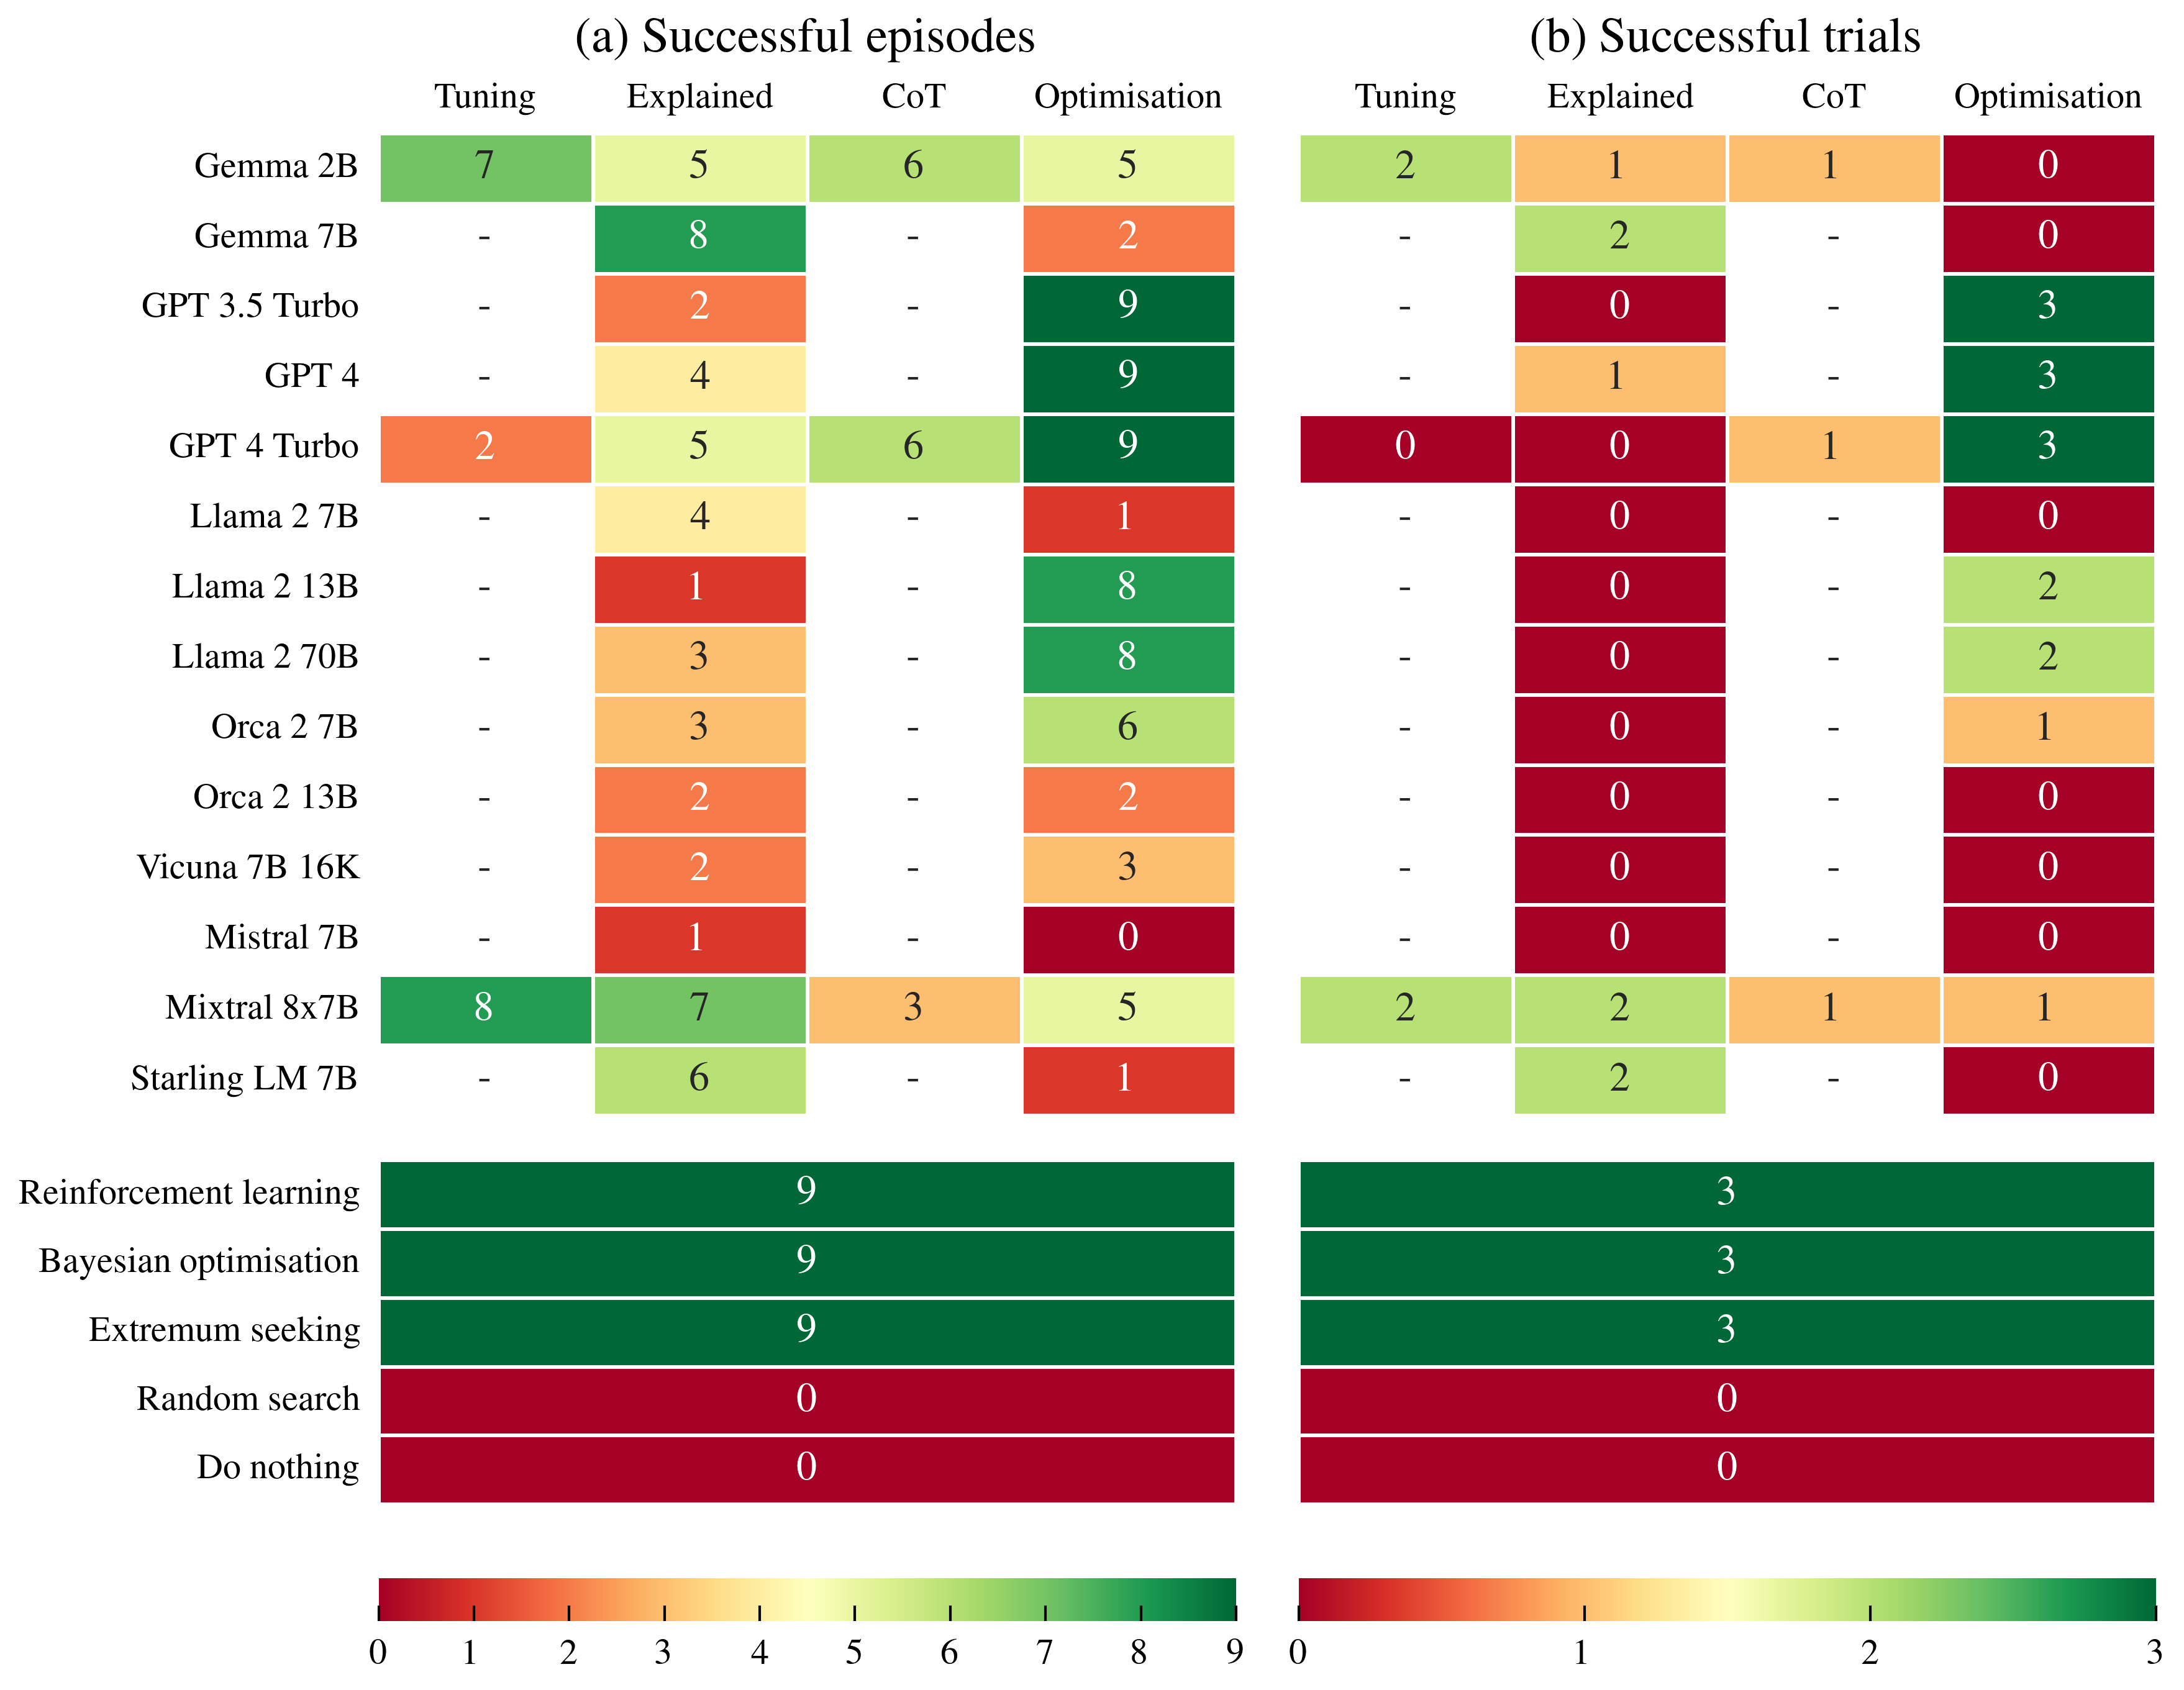

In [33]:
fig, axs = plt.subplots(2, 2, figsize=(6, 4.7), sharey="row", height_ratios=[1, 0.5])

cmap = plt.get_cmap("RdYlGn")
cmap.set_under("white")

sns.heatmap(
    successes_df.loc[
        (
            "Gemma 2B",
            "Gemma 7B",
            "GPT 3.5 Turbo",
            "GPT 4",
            "GPT 4 Turbo",
            "Llama 2 7B",
            "Llama 2 13B",
            "Llama 2 70B",
            "Orca 2 7B",
            "Orca 2 13B",
            "Vicuna 7B 16K",
            "Mistral 7B",
            "Mixtral 8x7B",
            "Starling LM 7B",
        ),
        :,
    ].fillna(-1),
    annot=successes_df.loc[
        (
            "Gemma 2B",
            "Gemma 7B",
            "GPT 3.5 Turbo",
            "GPT 4",
            "GPT 4 Turbo",
            "Llama 2 7B",
            "Llama 2 13B",
            "Llama 2 70B",
            "Orca 2 7B",
            "Orca 2 13B",
            "Vicuna 7B 16K",
            "Mistral 7B",
            "Mixtral 8x7B",
            "Starling LM 7B",
        ),
        :,
    ]
    .fillna(-1)
    .astype(int)
    .astype(str)
    .replace("-1", "-"),
    cmap=cmap,
    # center=6,
    vmin=0,
    vmax=9,
    linewidths=0.5,
    ax=axs[0, 0],
    cbar=False,
    fmt="",
)
axs[0, 0].set(xlabel="", ylabel="")
axs[0, 0].xaxis.tick_top()
axs[0, 0].tick_params(axis="both", which="both", length=0)
axs[0, 0].set_title("(a) Successful episodes")

sns.heatmap(
    successes_df.loc[
        (
            "Reinforcement learning",
            "Bayesian optimisation",
            "Extremum seeking",
            "Random search",
            "Do nothing",
        ),
        ("Optimisation",),
    ],
    annot=True,
    cmap=cmap,
    # center=6,
    vmin=0,
    vmax=9,
    linewidths=0.5,
    ax=axs[1, 0],
    cbar_kws={"location": "bottom", "ticks": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
)
axs[1, 0].set(xlabel="", ylabel="")
axs[1, 0].xaxis.tick_top()
axs[1, 0].tick_params(axis="both", which="both", length=0)
axs[1, 0].set_xticks([])

sns.heatmap(
    successful_trials_df.loc[
        (
            "Gemma 2B",
            "Gemma 7B",
            "GPT 3.5 Turbo",
            "GPT 4",
            "GPT 4 Turbo",
            "Llama 2 7B",
            "Llama 2 13B",
            "Llama 2 70B",
            "Orca 2 7B",
            "Orca 2 13B",
            "Vicuna 7B 16K",
            "Mistral 7B",
            "Mixtral 8x7B",
            "Starling LM 7B",
        ),
        :,
    ].fillna(-1),
    annot=successful_trials_df.loc[
        (
            "Gemma 2B",
            "Gemma 7B",
            "GPT 3.5 Turbo",
            "GPT 4",
            "GPT 4 Turbo",
            "Llama 2 7B",
            "Llama 2 13B",
            "Llama 2 70B",
            "Orca 2 7B",
            "Orca 2 13B",
            "Vicuna 7B 16K",
            "Mistral 7B",
            "Mixtral 8x7B",
            "Starling LM 7B",
        ),
        :,
    ]
    .fillna(-1)
    .astype(int)
    .astype(str)
    .replace("-1", "-"),
    cmap=cmap,
    # center=1,
    vmin=0,
    vmax=3,
    linewidths=0.5,
    ax=axs[0, 1],
    cbar=False,
    fmt="",
)
axs[0, 1].set(xlabel="", ylabel="")
axs[0, 1].xaxis.tick_top()
axs[0, 1].tick_params(axis="both", which="both", length=0)
axs[0, 1].set_title("(b) Successful trials")

sns.heatmap(
    successful_trials_df.loc[
        (
            "Reinforcement learning",
            "Bayesian optimisation",
            "Extremum seeking",
            "Random search",
            "Do nothing",
        ),
        ("Optimisation",),
    ],
    annot=True,
    cmap=cmap,
    # center=1,
    vmin=0,
    vmax=3,
    linewidths=0.5,
    ax=axs[1, 1],
    cbar_kws={"location": "bottom", "ticks": [0, 1, 2, 3]},
)
axs[1, 1].set(xlabel="", ylabel="")
axs[1, 1].xaxis.tick_top()
axs[1, 1].tick_params(axis="both", which="both", length=0)
axs[1, 1].set_xticks([])

fig.axes[4].minorticks_off()
fig.axes[5].minorticks_off()

plt.tight_layout()

plt.savefig(FIG_DIR / "success_heatmaps.pdf", bbox_inches="tight")
plt.show()

In [34]:
# Count how often each trial appears in the all_successful_trials list
counter = Counter(all_successful_trials)
print(counter)

Counter({0: 19, 33: 18, 38: 11})


In [35]:
extended_successes_df = successes_df.copy()
extended_successes_df

,Tuning,Explained,CoT,Optimisation
Gemma 2B,7.0,5.0,6.0,5.0
Gemma 7B,NaN,8.0,NaN,2.0
GPT 3.5 Turbo,NaN,2.0,NaN,9.0
GPT 4,NaN,4.0,NaN,9.0
GPT 4 Turbo,2.0,5.0,6.0,9.0
Llama 2 7B,NaN,4.0,NaN,1.0
Llama 2 13B,NaN,1.0,NaN,8.0
Llama 2 70B,NaN,3.0,NaN,8.0
Orca 2 7B,NaN,3.0,NaN,6.0
Orca 2 13B,NaN,2.0,NaN,2.0


In [36]:
for name, elo in elo_ratings.items():
    extended_successes_df.loc[name, "ELO"] = elo

for name, hellaswag in hellaswag_scores.items():
    extended_successes_df.loc[name, "HellaSwag"] = hellaswag

for name, mmlu in mmlu_scores.items():
    extended_successes_df.loc[name, "MMLU"] = mmlu

for name, mt_bench in mt_bench_scores.items():
    extended_successes_df.loc[name, "MT-bench"] = mt_bench

for name, num_param in num_parameters.items():
    extended_successes_df.loc[name, "Num parameters"] = num_param

for name in extended_successes_df.index:
    extended_successes_df.loc[name, "Optimisation Final MAE (mum)"] = df.loc[
        name, ("Final MAE (mum)", "Optimsation", "Mean")
    ]
    extended_successes_df.loc[name, "Explained Final MAE (mum)"] = df.loc[
        name, ("Final MAE (mum)", "Explained", "Mean")
    ]
    extended_successes_df.loc[name, "Optimisation Normalised MAE improvement (%)"] = (
        df.loc[name, ("Normalised MAE improvement (%)", "Optimsation", "Mean")]
    )
    extended_successes_df.loc[name, "Explained Normalised MAE improvement (%)"] = (
        df.loc[name, ("Normalised MAE improvement (%)", "Explained", "Mean")]
    )
    extended_successes_df.loc[name, "Optimisation Normalised accumulated MAE (%)"] = (
        df.loc[name, ("Normalised accumulated MAE (%)", "Optimsation", "Mean")]
    )
    extended_successes_df.loc[name, "Explained Normalised accumulated MAE (%)"] = (
        df.loc[name, ("Normalised accumulated MAE (%)", "Explained", "Mean")]
    )

extended_successes_df

,Tuning,Explained,CoT,Optimisation,ELO,HellaSwag,MMLU,MT-bench,Num parameters,Optimisation Final MAE (mum),Explained Final MAE (mum),Optimisation Normalised MAE improvement (%),Explained Normalised MAE improvement (%),Optimisation Normalised accumulated MAE (%),Explained Normalised accumulated MAE (%)
Gemma 2B,7.0,5.0,6.0,5.0,996.0,71.40,42.30,NaN,2.506435e+09,3180.0,1665.0,34.0,11.0,137.0,115.0
Gemma 7B,NaN,8.0,NaN,2.0,1037.0,81.20,64.30,NaN,8.538074e+09,8105.0,1651.0,284.0,-16.0,247.0,85.0
GPT 3.5 Turbo,NaN,2.0,NaN,9.0,1098.0,85.50,70.00,7.94,2.000000e+10,1197.0,11593.0,-36.0,397.0,78.0,292.0
GPT 4,NaN,4.0,NaN,9.0,1160.0,95.30,86.40,9.18,1.760000e+12,1213.0,1849.0,-40.0,11.0,73.0,98.0
GPT 4 Turbo,2.0,5.0,6.0,9.0,1249.0,NaN,NaN,9.32,NaN,962.0,2184.0,-50.0,20.0,67.0,107.0
Llama 2 7B,NaN,4.0,NaN,1.0,1031.0,77.20,45.80,6.27,7.000000e+09,2085.0,1432.0,15.0,-12.0,106.0,94.0
Llama 2 13B,NaN,1.0,NaN,8.0,1046.0,80.70,53.60,6.65,1.300000e+10,1507.0,1936.0,-22.0,5.0,85.0,101.0
Llama 2 70B,NaN,3.0,NaN,8.0,1083.0,85.30,63.00,6.86,7.000000e+10,1539.0,1947.0,-21.0,10.0,92.0,107.0
Orca 2 7B,NaN,3.0,NaN,6.0,NaN,81.56,53.70,5.65,7.000000e+09,1377.0,2149.0,-23.0,17.0,93.0,122.0
Orca 2 13B,NaN,2.0,NaN,2.0,NaN,77.75,57.73,6.15,1.300000e+10,3232.0,1634.0,77.0,-13.0,142.0,88.0


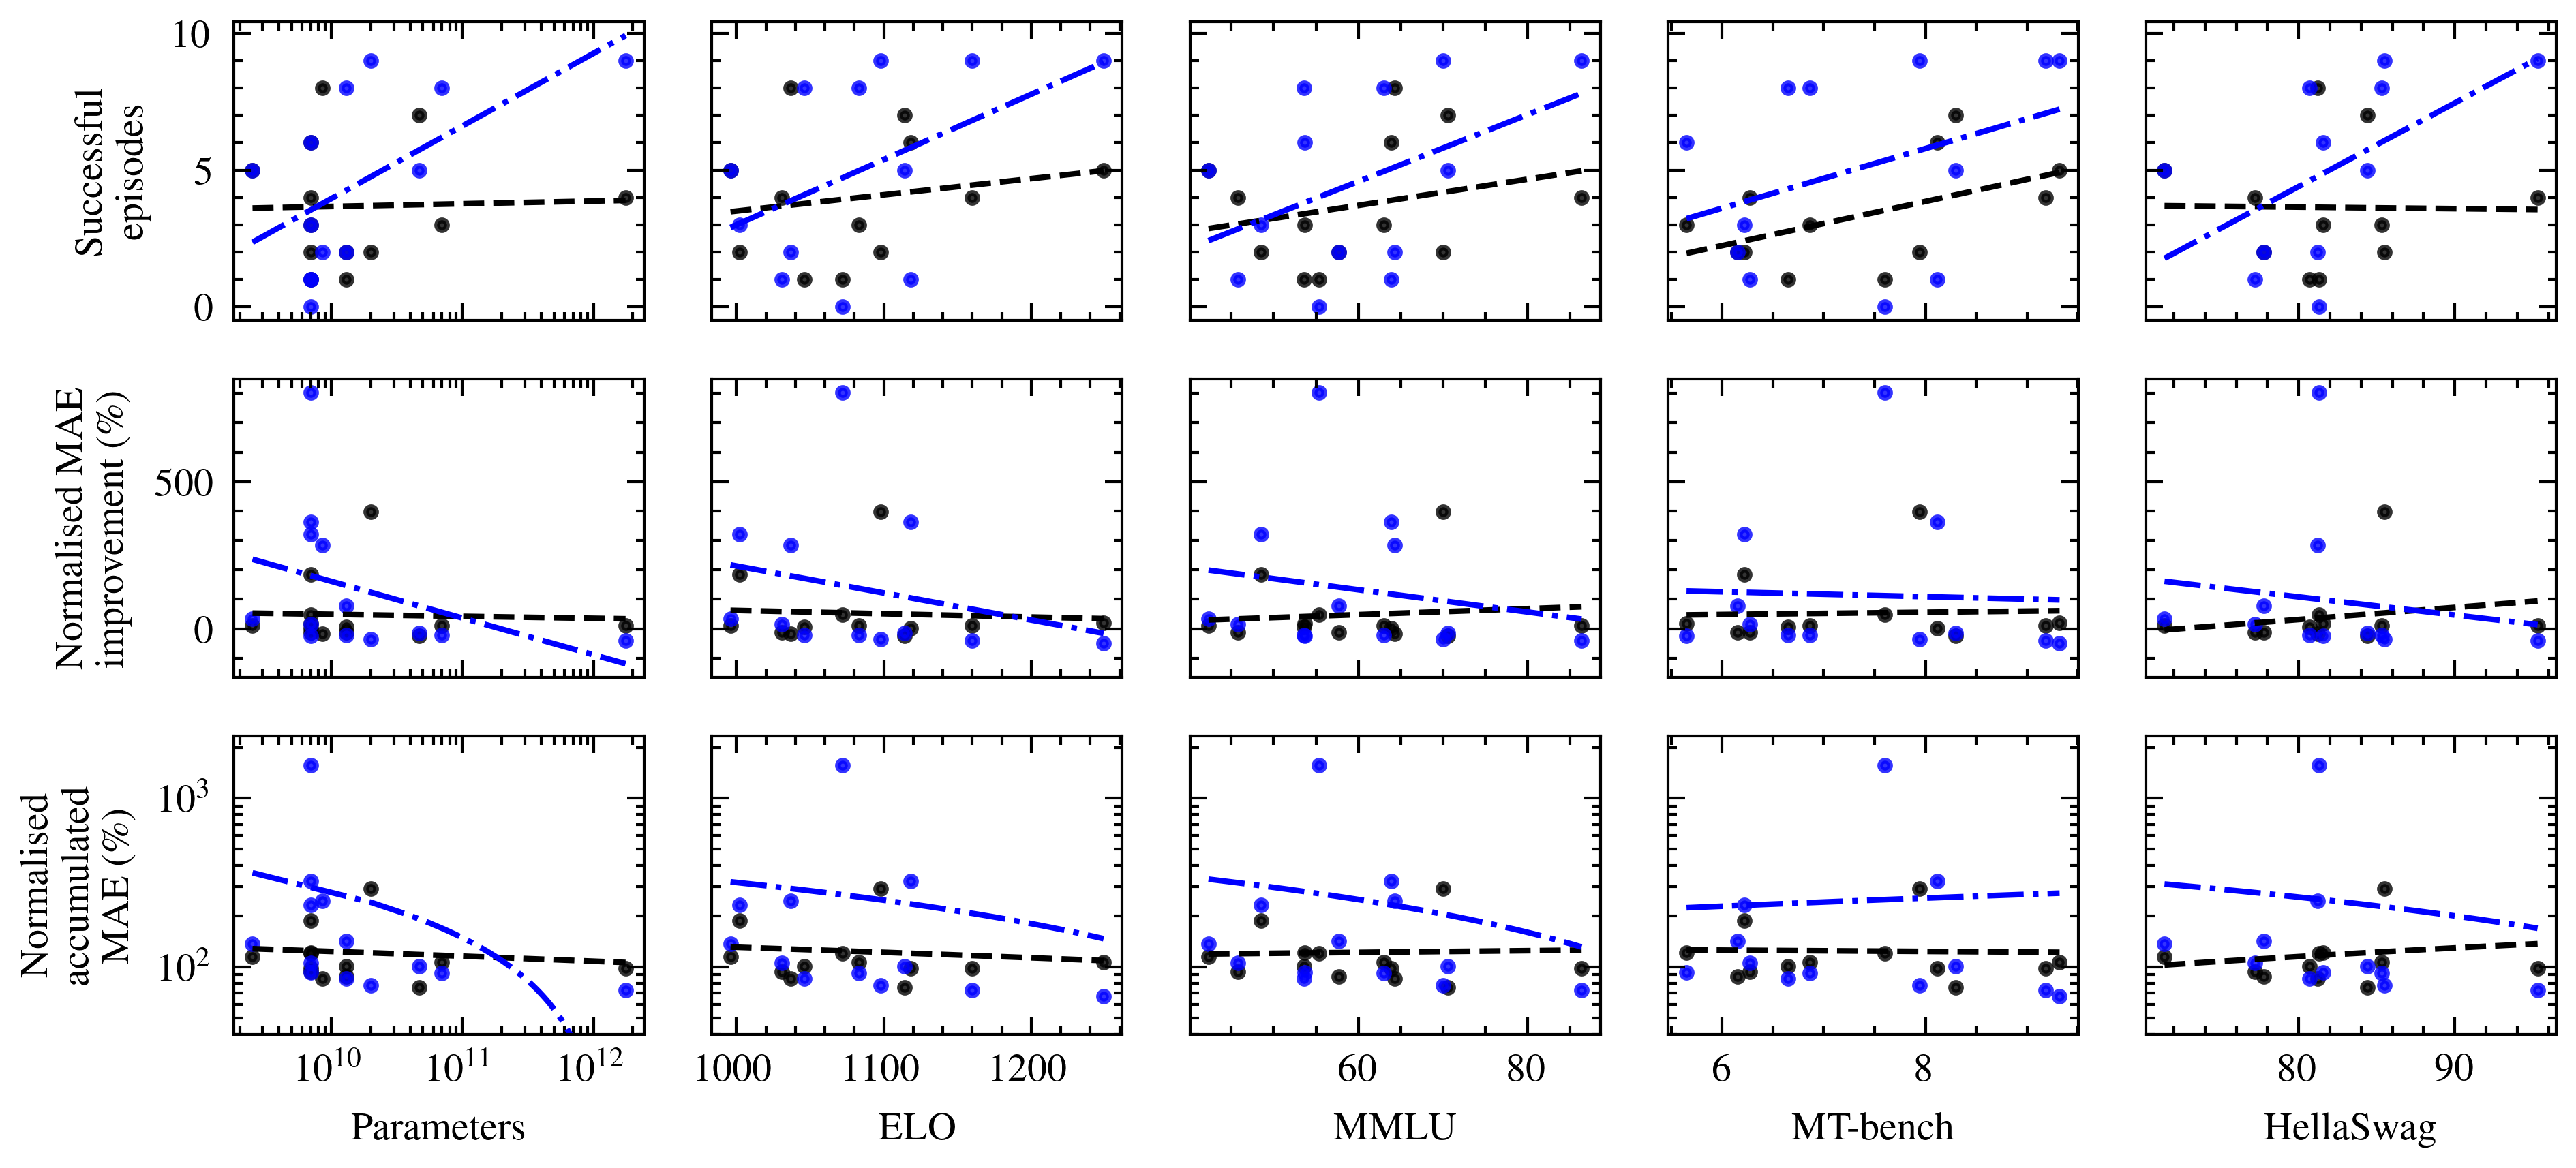

In [37]:
fig, axs = plt.subplots(3, 5, figsize=(6.44, 3), sharex="col", sharey="row")

sns.regplot(
    data=extended_successes_df,
    x="Num parameters",
    y="Explained",
    ci=None,
    scatter_kws={"s": 3},
    line_kws={"linewidth": 1},
    logx=True,
    ax=axs[0, 0],
)
sns.regplot(
    data=extended_successes_df,
    x="Num parameters",
    y="Optimisation",
    ci=None,
    scatter_kws={"s": 3},
    line_kws={"linewidth": 1},
    logx=True,
    ax=axs[0, 0],
)
axs[0, 0].set_xlabel(None)
axs[0, 0].set_ylabel("Successful\nepisodes")
axs[0, 0].set_xscale("log")

sns.regplot(
    data=extended_successes_df,
    x="ELO",
    y="Explained",
    ci=None,
    scatter_kws={"s": 3},
    line_kws={"linewidth": 1},
    ax=axs[0, 1],
)
sns.regplot(
    data=extended_successes_df,
    x="ELO",
    y="Optimisation",
    ci=None,
    scatter_kws={"s": 3},
    line_kws={"linewidth": 1},
    ax=axs[0, 1],
)
axs[0, 1].set_xlabel(None)
axs[0, 1].set_ylabel(None)

sns.regplot(
    data=extended_successes_df,
    x="MMLU",
    y="Explained",
    ci=None,
    scatter_kws={"s": 3},
    line_kws={"linewidth": 1},
    ax=axs[0, 2],
)
sns.regplot(
    data=extended_successes_df,
    x="MMLU",
    y="Optimisation",
    ci=None,
    scatter_kws={"s": 3},
    line_kws={"linewidth": 1},
    ax=axs[0, 2],
)
axs[0, 2].set_xlabel(None)
axs[0, 2].set_ylabel(None)

sns.regplot(
    data=extended_successes_df,
    x="MT-bench",
    y="Explained",
    ci=None,
    scatter_kws={"s": 3},
    line_kws={"linewidth": 1},
    ax=axs[0, 3],
)
sns.regplot(
    data=extended_successes_df,
    x="MT-bench",
    y="Optimisation",
    ci=None,
    scatter_kws={"s": 3},
    line_kws={"linewidth": 1},
    ax=axs[0, 3],
)
axs[0, 3].set_xlabel(None)
axs[0, 3].set_ylabel(None)

sns.regplot(
    data=extended_successes_df,
    x="HellaSwag",
    y="Explained",
    ci=None,
    scatter_kws={"s": 3},
    line_kws={"linewidth": 1},
    ax=axs[0, 4],
)
sns.regplot(
    data=extended_successes_df,
    x="HellaSwag",
    y="Optimisation",
    ci=None,
    scatter_kws={"s": 3},
    line_kws={"linewidth": 1},
    ax=axs[0, 4],
)
axs[0, 4].set_xlabel(None)
axs[0, 4].set_ylabel(None)

sns.regplot(
    data=extended_successes_df,
    x="Num parameters",
    y="Explained Normalised MAE improvement (%)",
    ci=None,
    scatter_kws={"s": 3},
    line_kws={"linewidth": 1},
    logx=True,
    ax=axs[1, 0],
)
sns.regplot(
    data=extended_successes_df,
    x="Num parameters",
    y="Optimisation Normalised MAE improvement (%)",
    ci=None,
    scatter_kws={"s": 3},
    line_kws={"linewidth": 1},
    logx=True,
    ax=axs[1, 0],
)
axs[1, 0].set_xlabel(None)
axs[1, 0].set_ylabel("Normalised MAE\nimprovement (\%)")
axs[1, 0].set_xscale("log")

sns.regplot(
    data=extended_successes_df,
    x="ELO",
    y="Explained Normalised MAE improvement (%)",
    ci=None,
    scatter_kws={"s": 3},
    line_kws={"linewidth": 1},
    ax=axs[1, 1],
)
sns.regplot(
    data=extended_successes_df,
    x="ELO",
    y="Optimisation Normalised MAE improvement (%)",
    ci=None,
    scatter_kws={"s": 3},
    line_kws={"linewidth": 1},
    ax=axs[1, 1],
)
axs[1, 1].set_xlabel(None)
axs[1, 1].set_ylabel(None)

sns.regplot(
    data=extended_successes_df,
    x="MMLU",
    y="Explained Normalised MAE improvement (%)",
    ci=None,
    scatter_kws={"s": 3},
    line_kws={"linewidth": 1},
    ax=axs[1, 2],
)
sns.regplot(
    data=extended_successes_df,
    x="MMLU",
    y="Optimisation Normalised MAE improvement (%)",
    ci=None,
    scatter_kws={"s": 3},
    line_kws={"linewidth": 1},
    ax=axs[1, 2],
)
axs[1, 2].set_xlabel(None)
axs[1, 2].set_ylabel(None)

sns.regplot(
    data=extended_successes_df,
    x="MT-bench",
    y="Explained Normalised MAE improvement (%)",
    ci=None,
    scatter_kws={"s": 3},
    line_kws={"linewidth": 1},
    ax=axs[1, 3],
)
sns.regplot(
    data=extended_successes_df,
    x="MT-bench",
    y="Optimisation Normalised MAE improvement (%)",
    ci=None,
    scatter_kws={"s": 3},
    line_kws={"linewidth": 1},
    ax=axs[1, 3],
)
axs[1, 3].set_xlabel(None)
axs[1, 3].set_ylabel(None)

sns.regplot(
    data=extended_successes_df,
    x="HellaSwag",
    y="Explained Normalised MAE improvement (%)",
    ci=None,
    scatter_kws={"s": 3},
    line_kws={"linewidth": 1},
    ax=axs[1, 4],
)
sns.regplot(
    data=extended_successes_df,
    x="HellaSwag",
    y="Optimisation Normalised MAE improvement (%)",
    ci=None,
    scatter_kws={"s": 3},
    line_kws={"linewidth": 1},
    ax=axs[1, 4],
)
axs[1, 4].set_xlabel(None)
axs[1, 4].set_ylabel(None)

sns.regplot(
    data=extended_successes_df,
    x="Num parameters",
    y="Explained Normalised accumulated MAE (%)",
    ci=None,
    scatter_kws={"s": 3},
    line_kws={"linewidth": 1},
    logx=True,
    ax=axs[2, 0],
)
sns.regplot(
    data=extended_successes_df,
    x="Num parameters",
    y="Optimisation Normalised accumulated MAE (%)",
    ci=None,
    scatter_kws={"s": 3},
    line_kws={"linewidth": 1},
    logx=True,
    ax=axs[2, 0],
)
axs[2, 0].set_xlabel("Parameters")
axs[2, 0].set_ylabel("Normalised\naccumulated\nMAE (\%)")
axs[2, 0].set_xscale("log")
axs[2, 0].set_yscale("log")
axs[2, 0].set_ylim(4e1, None)

sns.regplot(
    data=extended_successes_df,
    x="ELO",
    y="Explained Normalised accumulated MAE (%)",
    ci=None,
    scatter_kws={"s": 3},
    line_kws={"linewidth": 1},
    ax=axs[2, 1],
)
sns.regplot(
    data=extended_successes_df,
    x="ELO",
    y="Optimisation Normalised accumulated MAE (%)",
    ci=None,
    scatter_kws={"s": 3},
    line_kws={"linewidth": 1},
    ax=axs[2, 1],
)
axs[2, 1].set_xlabel("ELO")
axs[2, 1].set_ylabel(None)
axs[2, 1].set_yscale("log")

sns.regplot(
    data=extended_successes_df,
    x="MMLU",
    y="Explained Normalised accumulated MAE (%)",
    ci=None,
    scatter_kws={"s": 3},
    line_kws={"linewidth": 1},
    ax=axs[2, 2],
)
sns.regplot(
    data=extended_successes_df,
    x="MMLU",
    y="Optimisation Normalised accumulated MAE (%)",
    ci=None,
    scatter_kws={"s": 3},
    line_kws={"linewidth": 1},
    ax=axs[2, 2],
)
axs[2, 2].set_xlabel("MMLU")
axs[2, 2].set_ylabel(None)
axs[2, 2].set_yscale("log")

sns.regplot(
    data=extended_successes_df,
    x="MT-bench",
    y="Explained Normalised accumulated MAE (%)",
    ci=None,
    scatter_kws={"s": 3},
    line_kws={"linewidth": 1},
    ax=axs[2, 3],
)
sns.regplot(
    data=extended_successes_df,
    x="MT-bench",
    y="Optimisation Normalised accumulated MAE (%)",
    ci=None,
    scatter_kws={"s": 3},
    line_kws={"linewidth": 1},
    ax=axs[2, 3],
)
axs[2, 3].set_xlabel("MT-bench")
axs[2, 3].set_ylabel(None)
axs[2, 3].set_yscale("log")

sns.regplot(
    data=extended_successes_df,
    x="HellaSwag",
    y="Explained Normalised accumulated MAE (%)",
    ci=None,
    scatter_kws={"s": 3},
    line_kws={"linewidth": 1},
    ax=axs[2, 4],
)
sns.regplot(
    data=extended_successes_df,
    x="HellaSwag",
    y="Optimisation Normalised accumulated MAE (%)",
    ci=None,
    scatter_kws={"s": 3},
    line_kws={"linewidth": 1},
    ax=axs[2, 4],
)
axs[2, 4].set_xlabel("HellaSwag")
axs[2, 4].set_ylabel(None)
axs[2, 4].set_yscale("log")

plt.tight_layout()

plt.savefig(FIG_DIR / "correlations.pdf", bbox_inches="tight")
plt.show()

In [38]:
print("Baselines")
print("---------")
for study in baseline_studies:
    print(f"{study.name}: {study.average_inference_times()}")
print("")
print("Tuning Prompt")
print("-------------")
for study in tuning_llm_studies:
    print(f"{study.name}: {study.average_inference_times()}")
print("")
print("Explained Prompt")
print("----------------")
for study in explained_llm_studies:
    print(f"{study.name}: {study.average_inference_times()}")
print("")
print("Chain-of-thought Prompt")
print("-----------------------")
for study in cot_llm_studies:
    print(f"{study.name}: {study.average_inference_times()}")
print("")
print("Optimisation Prompt")
print("-------------------")
for study in optimization_llm_studies:
    print(f"{study.name}: {study.average_inference_times()}")

Baselines
---------
Reinforcement learning: 0:00:00.000166
Bayesian optimisation: 0:00:00.728215
Extremum seeking: 0:00:00.001130
Random search: 0:00:00.000053
Do nothing: 0:00:00.000002

Tuning Prompt
-------------
Gemma 2B: 0:00:00.743289
GPT 4 Turbo: 0:00:03.562591
Mixtral 8x7B: 0:00:03.345535

Explained Prompt
----------------
Gemma 2B: 0:00:00.784557
Gemma 7B: 0:00:02.109201
GPT 3.5 Turbo: 0:00:01.510073
GPT 4: 0:00:03.792093
GPT 4 Turbo: 0:00:03.398355
Llama 2 7B: 0:00:03.433343
Llama 2 13B: 0:00:06.112909
Llama 2 70B: 0:00:06.478510
Mistral 7B: 0:00:01.371939
Mixtral 8x7B: 0:00:03.867385
Orca 2 7B: 0:00:14.408531
Orca 2 13B: 0:00:30.312207
Starling LM 7B: 0:00:04.323487
Vicuna 7B 16K: 0:00:02.559596

Chain-of-thought Prompt
-----------------------
Gemma 2B: 0:00:01.004448
GPT 4 Turbo: 0:00:28.349942
Mixtral 8x7B: 0:00:05.959525

Optimisation Prompt
-------------------
Gemma 2B: 0:00:01.339461
Gemma 7B: 0:00:02.038525
GPT 3.5 Turbo: 0:00:01.426449
GPT 4: 0:00:03.615611
GPT 4 Turb

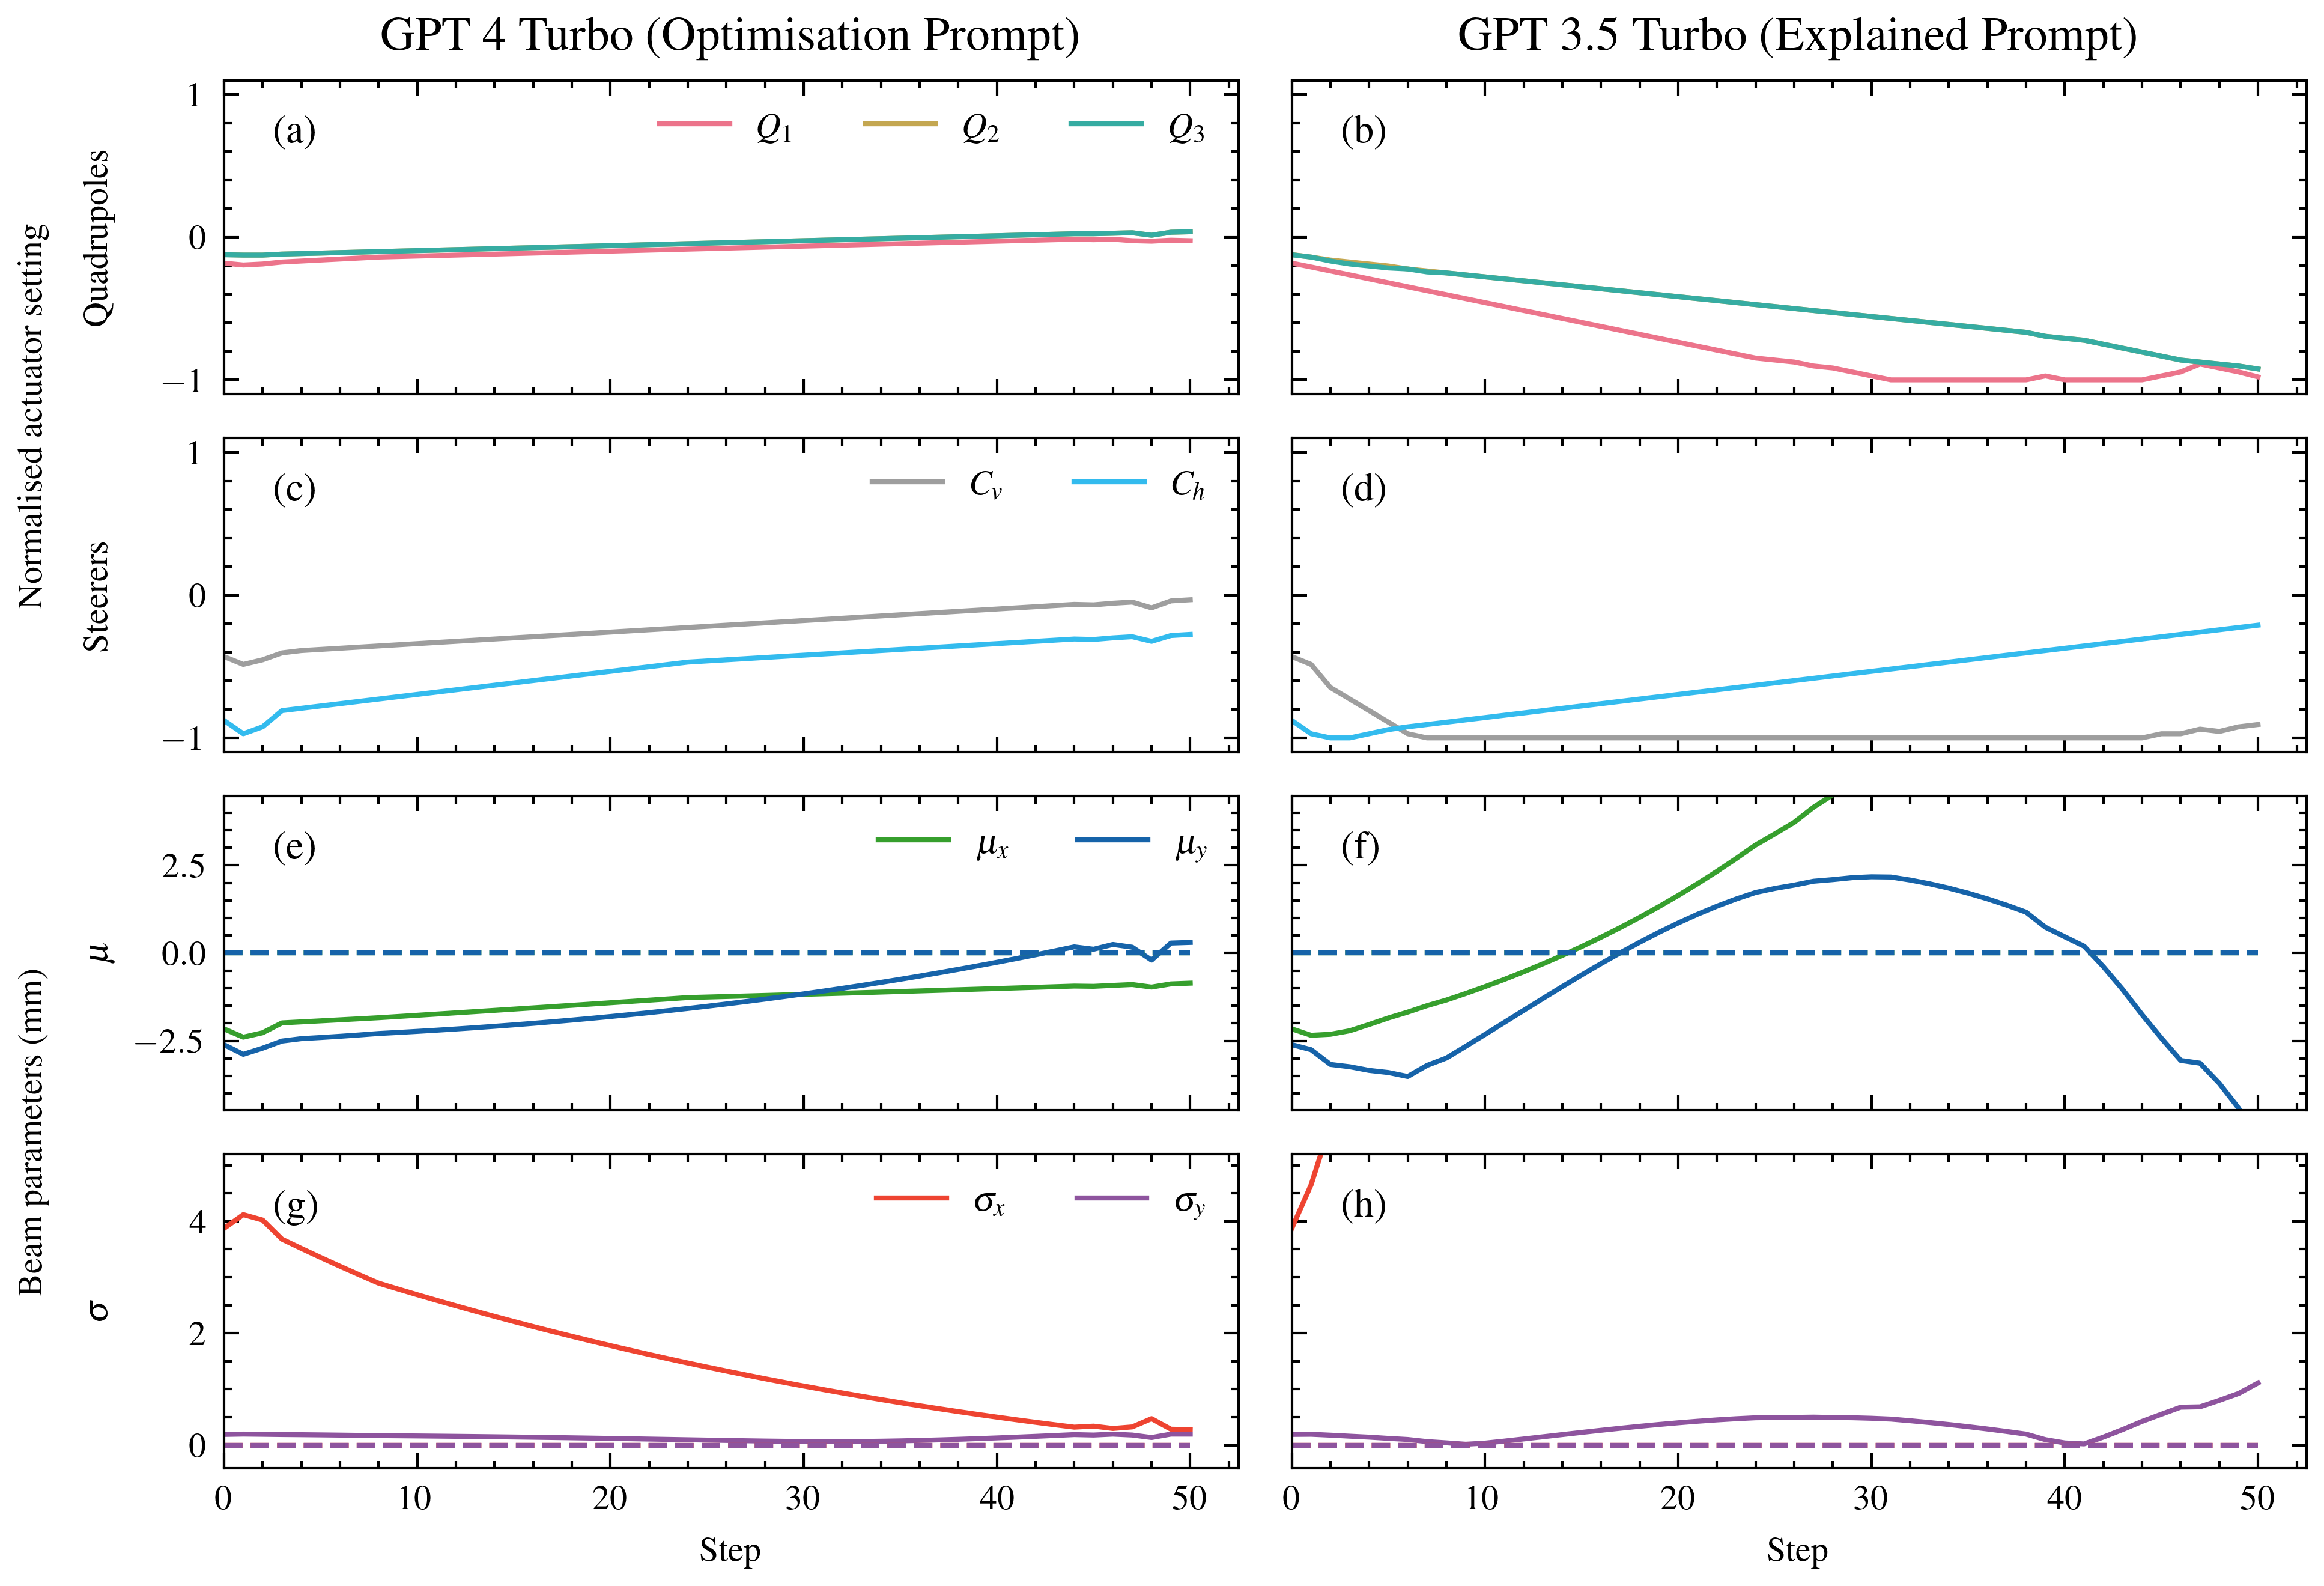

In [39]:
left_episode = gpt_4_turbo_optimization_study.episodes[1]
right_episode = gpt_35_turbo_explained_study.episodes[2]

# Plot Layout
fig = plt.figure(figsize=(469.7 / 72.72 * 1.24, 5))

gs = fig.add_gridspec(1, 1)
gs00 = gs[0].subgridspec(4, 3, width_ratios=[0.1, 1, 1], hspace=0.14, wspace=0.075)

ax_left_quadrupole = fig.add_subplot(gs00[0, 1])
ax_left_steerer = fig.add_subplot(
    gs00[1, 1], sharex=ax_left_quadrupole, sharey=ax_left_quadrupole
)
ax_left_mu = fig.add_subplot(gs00[2, 1], sharex=ax_left_quadrupole)
ax_left_sigma = fig.add_subplot(gs00[3, 1], sharex=ax_left_quadrupole)

ax_right_quadrupole = fig.add_subplot(gs00[0, 2], sharey=ax_left_quadrupole)
ax_right_steerer = fig.add_subplot(
    gs00[1, 2], sharex=ax_right_quadrupole, sharey=ax_left_steerer
)
ax_right_mu = fig.add_subplot(gs00[2, 2], sharex=ax_right_quadrupole, sharey=ax_left_mu)
ax_right_sigma = fig.add_subplot(
    gs00[3, 2], sharex=ax_right_quadrupole, sharey=ax_left_sigma
)

ax_dummy1 = fig.add_subplot(gs00[:2, 0])
ax_dummy2 = fig.add_subplot(gs00[2:, 0])
# ax_dummy1.set_visible(False)
for ax in [ax_dummy1, ax_dummy2]:
    ax.set_xticks([])
    ax.set_yticks([])
    [ax.spines[side].set_visible(False) for side in ("left", "top", "right", "bottom")]
    ax.patch.set_visible(False)

for ax in [
    ax_left_steerer,
    ax_left_quadrupole,
    ax_left_mu,
    ax_right_steerer,
    ax_right_quadrupole,
    ax_right_mu,
]:
    ax.xaxis.set_tick_params(labelbottom=False)
for ax in [ax_right_steerer, ax_right_quadrupole, ax_right_mu, ax_right_sigma]:
    ax.yaxis.set_tick_params(labelleft=False)

#############
# Plotting
left_episode.plot_quadrupoles(
    ax=ax_left_quadrupole, xlabel=False, ylabel=False, legend=False, normalize=True
)
ax_left_quadrupole.lines[0].set_label(r"$Q_1$")
ax_left_quadrupole.lines[1].set_label(r"$Q_2$")
ax_left_quadrupole.lines[2].set_label(r"$Q_3$")
ax_left_quadrupole.legend(loc="upper right", ncol=3)
left_episode.plot_steerers(
    ax=ax_left_steerer, xlabel=False, ylabel=False, legend=False, normalize=True
)
ax_left_steerer.lines[0].set_label(r"$C_v$")
ax_left_steerer.lines[1].set_label(r"$C_h$")
ax_left_steerer.legend(loc="upper right", ncol=2)

left_episode.plot_beam_parameters(
    ax=ax_left_mu, xlabel=False, mode="mu", legend=False, ylabel=False
)
ax_left_mu.legend(loc="upper right", ncol=2)
left_episode.plot_beam_parameters(
    ax=ax_left_sigma, xlabel=False, mode="sigma", legend=False, ylabel=False
)
ax_left_sigma.legend(loc="upper right", ncol=2)

right_episode.plot_quadrupoles(
    ax=ax_right_quadrupole, xlabel=False, ylabel=False, legend=False, normalize=True
)
right_episode.plot_steerers(
    ax=ax_right_steerer, xlabel=False, ylabel=False, legend=False, normalize=True
)

right_episode.plot_beam_parameters(
    ax=ax_right_mu, xlabel=False, mode="mu", legend=False, ylabel=False
)
right_episode.plot_beam_parameters(
    ax=ax_right_sigma, xlabel=False, mode="sigma", legend=False, ylabel=False
)

#############
# Labels
ax_left_sigma.set_xlabel("Step")
ax_right_sigma.set_xlabel("Step")
ax_dummy1.set_ylabel("Normalised actuator setting")
ax_dummy2.set_ylabel("Beam parameters (mm)")
ax_left_sigma.set_ylabel(r"$\sigma$")
ax_left_mu.set_ylabel(r"$\mu$")
ax_left_steerer.set_ylabel("Steerers")
ax_left_quadrupole.set_ylabel("Quadrupoles")

ax_left_quadrupole.set_title("GPT 4 Turbo (Optimisation Prompt)")
ax_right_quadrupole.set_title("GPT 3.5 Turbo (Explained Prompt)")

data_axes = [
    ax_left_quadrupole,
    ax_right_quadrupole,
    ax_left_steerer,
    ax_right_steerer,
    ax_left_mu,
    ax_right_mu,
    ax_left_sigma,
    ax_right_sigma,
]
bo_axes = [ax_right_quadrupole, ax_right_steerer, ax_right_mu, ax_right_sigma]
rl_axes = [ax_left_quadrupole, ax_left_steerer, ax_left_mu, ax_left_sigma]
subfig_names = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)", "(g)", "(h)"]
for idx, ax in enumerate(data_axes):
    ax.text(x=0.05, y=0.8, s=subfig_names[idx], transform=ax.transAxes)

for ax in [ax_left_sigma, ax_right_sigma]:
    ax.set_ylim(None, 5.2)

# Fine tuning
fig.align_ylabels([ax_left_steerer, ax_left_quadrupole, ax_left_mu, ax_left_sigma])

fig.savefig(f"{FIG_DIR}/example_episodes_combined.pdf", bbox_inches="tight")
plt.show()

In [40]:
ax_left_quadrupole.get_yticklabels()

[Text(0, -2.0, '$\\mathdefault{−2}$'),
 Text(0, -1.0, '$\\mathdefault{−1}$'),
 Text(0, 0.0, '$\\mathdefault{0}$'),
 Text(0, 1.0, '$\\mathdefault{1}$'),
 Text(0, 2.0, '$\\mathdefault{2}$')]

In [41]:
ax_left_quadrupole.get_yticks()

array([-2., -1.,  0.,  1.,  2.])